# Instituto Tecnológico de Costa Rica

### Escuela de Ingeniería en Computación

### Maestría Académica en Ciencias de la Computación

### Curso: Aprendizaje Automático (Machine Learning)

# Proyecto Final
- Agregar nombre del proyecto
## Estudiantes:
- Emmanuel Rosales Salas - 2013108931
- Alejandro Arroyo Valle - 2016108971

# Carga de Bibliotecas y Dataset

## Instalar las bibliotecas necesarias

In [1]:
%pip install -q numpy pandas matplotlib seaborn scikit-learn statsmodels pmdarima xgboost lightgbm

Note: you may need to restart the kernel to use updated packages.


## Importación de la clases

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.feature_selection import mutual_info_regression
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

## Importar los datos.

In [ ]:
raw_dataset = pd.read_csv('multi_data_01.csv', header = 0, parse_dates = [0], index_col = 0)
## Algunos datos estan desordenados, los ordenamos por fecha
raw_dataset = raw_dataset.sort_index()

## Para pruenas, reducir el tamaÑo del dataset
lite_size = int(len(raw_dataset) * 0.1)
raw_dataset = raw_dataset.iloc[:lite_size]

raw_dataset.head()

,runautomode_bool,actual_speed_m_min,secundary_pumpspeed_rpm,secundary_pa16d1_bar,secundary_p014d1_bar,secundary_p015d1_bar,secundary_pa7b3_mm,secundary_pa4b2_c,secundary_pa4b5_c,secundary_pu2b2_c,...,primary_p015d1_bar,primary_pa7b3_mm,primary_pa4b2_c,primary_pa4b5_c,primary_pu2b2_c,primary_p012b3_c,primary_p022b3_c,primary_pa16d6_c,primary_p014d6_c,primary_p015d6_c
date_time,,,,,,,,,,,,,,,,,,,,,
2023-06-22 14:17:24.698380,t,3.500000,21.831861,33.174477,94.676770,57.584450,33.328247,99.9,103.1,99.9,...,76.056860,225.26270,101.3,99.7,99.9,86.3,100.2,869.9,98.9,103.5
2023-06-22 14:17:30.468259,t,3.702725,25.683084,32.924850,97.399980,59.626854,33.132996,99.9,103.1,99.9,...,81.423840,224.77570,101.7,99.7,99.8,86.1,100.1,869.9,98.9,103.3
2023-06-22 14:17:35.891179,t,4.082303,28.471409,32.860012,102.812355,63.836475,33.035340,99.9,103.2,99.9,...,81.900406,224.58087,101.7,99.7,99.6,86.1,100.2,869.9,98.8,103.2
2023-06-22 14:17:40.972308,t,4.322869,30.506277,32.804900,106.148280,66.593720,33.100403,99.9,103.2,99.9,...,81.696170,224.45099,101.9,99.6,99.7,85.8,100.0,869.9,98.7,103.1
2023-06-22 14:17:46.051777,t,4.709167,32.320232,32.584450,111.163510,70.587750,33.035340,99.9,103.2,99.9,...,86.416390,224.54840,101.9,99.6,99.7,85.6,99.9,869.9,98.6,102.9


# Exploración de Datos

## Contexto de los datos

![Texto alternativo](image005.png)
![Texto alternativo](drum_press.jpg)

Este dataset contiene datos de dos máquinas de producción, estas máquinas son prensas hidráulicas que bombean material adhesivo sobre una lámina plástica, similares a la imagen anterior. Además del timestamp, las columnas representan valores de diferentes sensores que tiene cada prensa.

En el nombre de cada columna hay un sufijo que describe si el valor corresponde a la prensa "secundary" o "primary". Después de este sufijo, se especifíca el nombre del sensor que está siendo leído, finalmente los nombres de las columnas termina con la unidad de la variable en cuestión.

El nombre del sensor se puede referenciar en la primer imagen.

In [4]:
print("Descripción del Dataset");
raw_dataset.describe()

Descripción del Dataset


,actual_speed_m_min,secundary_pumpspeed_rpm,secundary_pa16d1_bar,secundary_p014d1_bar,secundary_p015d1_bar,secundary_pa7b3_mm,secundary_pa4b2_c,secundary_pa4b5_c,secundary_pu2b2_c,secundary_p012b3_c,...,primary_p015d1_bar,primary_pa7b3_mm,primary_pa4b2_c,primary_pa4b5_c,primary_pu2b2_c,primary_p012b3_c,primary_p022b3_c,primary_pa16d6_c,primary_p014d6_c,primary_p015d6_c
count,93978.000000,93978.000000,93978.000000,93978.000000,93978.000000,93978.000000,93978.000000,93978.000000,93978.000000,93978.000000,...,93978.000000,93978.000000,93978.000000,93978.000000,93978.000000,93978.000000,93978.000000,9.397800e+04,93978.000000,93978.000000
mean,4.030431,36.243256,28.960490,94.802332,58.151710,286.810514,96.816336,100.441528,96.730020,92.769168,...,79.311152,333.344500,101.345613,98.313548,98.263784,83.142125,96.075564,8.699000e+02,94.427193,250.084231
std,3.105981,25.531103,8.188100,50.112338,36.984447,153.112224,12.993555,13.679756,13.151063,14.352947,...,43.453791,191.484820,42.173575,25.056442,24.987490,26.675790,15.649662,1.136874e-13,10.834537,255.804240
min,0.000000,0.000000,1.455618,1.350256,-1.123322,6.639587,30.400000,30.800000,30.200000,30.200000,...,-0.601375,2.337646,-200.000000,41.500000,40.900000,24.100000,23.500000,8.699000e+02,39.600000,26.900000
25%,0.000000,8.308798,29.439796,45.477530,19.414186,166.608830,99.900000,103.400000,99.800000,94.200000,...,34.598894,179.677670,102.500000,99.800000,99.800000,83.800000,99.800000,8.699000e+02,94.100000,103.000000
50%,6.000000,42.798168,30.230824,123.134280,79.205565,286.675260,100.000000,103.800000,100.000000,96.100000,...,102.596760,337.731750,104.000000,100.000000,100.000000,85.400000,99.900000,8.699000e+02,96.400000,115.700000
75%,6.500000,53.763862,33.070736,136.409900,89.105550,405.537480,100.100000,104.100000,100.100000,97.900000,...,114.011536,477.766050,105.100000,100.200000,100.200000,87.200000,100.200000,8.699000e+02,98.900000,251.700000
max,7.800000,100.000000,36.776240,255.788420,219.910190,730.195300,101.300000,105.600000,101.300000,103.700000,...,218.003940,976.831200,869.900000,869.900000,869.900000,869.900000,101.700000,8.699000e+02,109.400000,869.900000


In [5]:
print(f"Las dimensiones del dataset son (filas, columnas): {raw_dataset.shape}")

Las dimensiones del dataset son (filas, columnas): (93978, 29)


In [6]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93978 entries, 2023-06-22 14:17:24.698380 to 2023-06-28 03:06:55.994349
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   runautomode_bool             93978 non-null  object 
 1   actual_speed_m_min           93978 non-null  float64
 2   secundary_pumpspeed_rpm      93978 non-null  float64
 3   secundary_pa16d1_bar         93978 non-null  float64
 4   secundary_p014d1_bar         93978 non-null  float64
 5   secundary_p015d1_bar         93978 non-null  float64
 6   secundary_pa7b3_mm           93978 non-null  float64
 7   secundary_pa4b2_c            93978 non-null  float64
 8   secundary_pa4b5_c            93978 non-null  float64
 9   secundary_pu2b2_c            93978 non-null  float64
 10  secundary_p012b3_c           93978 non-null  float64
 11  secundary_p022b3_c           93978 non-null  float64
 12  secundary_pa16d6_c       

## Gráficos

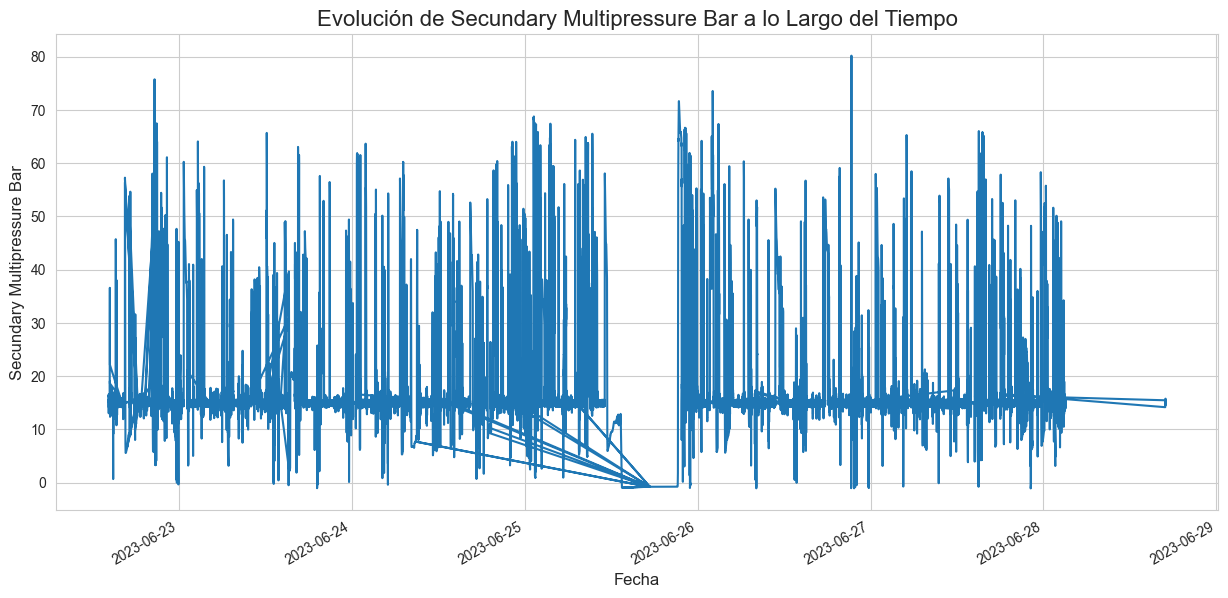

In [7]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 7) # Aumentar el tamaño del gráfico

raw_dataset['secundary_multipressure_bar'].plot()

# Añadir títulos y etiquetas para mayor claridad
plt.title('Evolución de Secundary Multipressure Bar a lo Largo del Tiempo', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Secundary Multipressure Bar', fontsize=12)
plt.show()

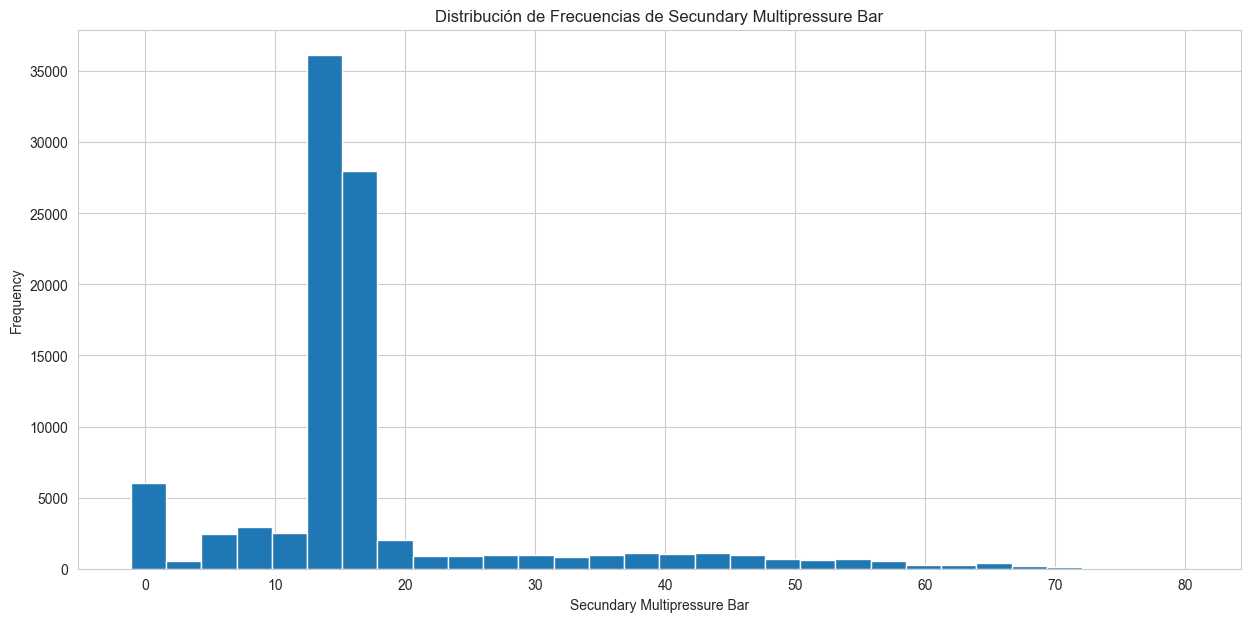

In [8]:
raw_dataset['secundary_multipressure_bar'].plot(kind='hist', bins=30, title='Distribución de Frecuencias de Secundary Multipressure Bar')
plt.xlabel('Secundary Multipressure Bar')
plt.show()

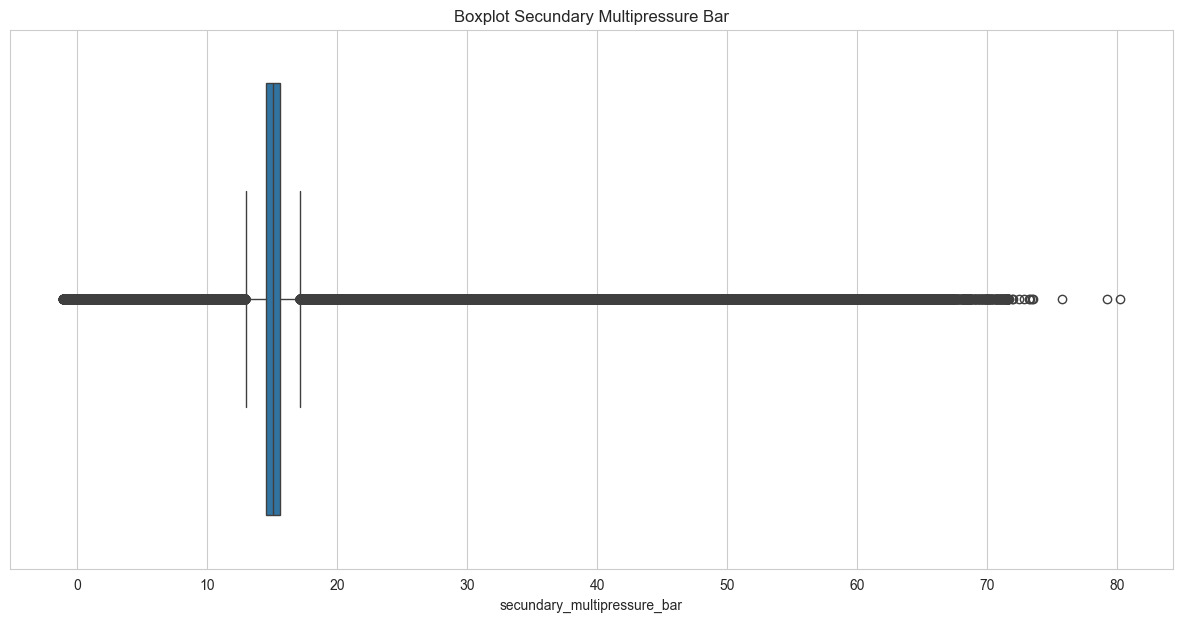

In [9]:
sns.boxplot(x=raw_dataset['secundary_multipressure_bar'])
plt.title('Boxplot Secundary Multipressure Bar')
plt.show()

# Preprocesamiento de Datos

## Eliminación de las columnas primary

Dada la naturaleza de nuestro proyecto, queremos predecir la variable secundary_multipressure_bar, por esta razón, todas las caracterísiticas que influyen en ella son las que tienen como pre fijos "secundary". Por esta razón, las columnas que son de primary, no son necesarias para nuestra predicción, por lo tanto procedemos a eliminarlas.

In [10]:
# Eliminar las columnas relacionadas con primary

# Primero se obtienen los nombres de las columnas que contienen 'primary'
primary_columns = raw_dataset.filter(like = 'primary').columns

# Eliminamos las columnas del DataFrame
processed_dataset = raw_dataset.drop(columns = primary_columns)

# Imprimir la cantidad de columnas eliminadas y las primeras filas del nuevo DataFrame
print("\nDataFrame después de eliminar las columnas:")
print(f"Se eliminaron {len(primary_columns)}")
processed_dataset.head()



DataFrame después de eliminar las columnas:
Se eliminaron 13


,runautomode_bool,actual_speed_m_min,secundary_pumpspeed_rpm,secundary_pa16d1_bar,secundary_p014d1_bar,secundary_p015d1_bar,secundary_pa7b3_mm,secundary_pa4b2_c,secundary_pa4b5_c,secundary_pu2b2_c,secundary_p012b3_c,secundary_p022b3_c,secundary_pa16d6_c,secundary_p014d6_c,secundary_p015d6_c,secundary_multipressure_bar
date_time,,,,,,,,,,,,,,,,
2023-06-22 14:17:24.698380,t,3.500000,21.831861,33.174477,94.676770,57.584450,33.328247,99.9,103.1,99.9,93.9,99.9,102.2,95.8,108.8,15.024406
2023-06-22 14:17:30.468259,t,3.702725,25.683084,32.924850,97.399980,59.626854,33.132996,99.9,103.1,99.9,93.9,99.8,102.1,95.8,108.8,14.090146
2023-06-22 14:17:35.891179,t,4.082303,28.471409,32.860012,102.812355,63.836475,33.035340,99.9,103.2,99.9,93.8,100.1,102.2,95.8,108.6,14.032947
2023-06-22 14:17:40.972308,t,4.322869,30.506277,32.804900,106.148280,66.593720,33.100403,99.9,103.2,99.9,93.8,100.3,102.2,95.8,108.6,13.346553
2023-06-22 14:17:46.051777,t,4.709167,32.320232,32.584450,111.163510,70.587750,33.035340,99.9,103.2,99.9,93.8,100.3,102.2,95.8,108.6,13.003356


## Verificación de la columna de tiempo este en el formato y tipo correcto

In [11]:
# Validar el tipo de la columna de tiempo sea el indice
print(processed_dataset.index)

DatetimeIndex(['2023-06-22 14:17:24.698380', '2023-06-22 14:17:30.468259',
               '2023-06-22 14:17:35.891179', '2023-06-22 14:17:40.972308',
               '2023-06-22 14:17:46.051777', '2023-06-22 14:17:51.128885',
               '2023-06-22 14:17:56.211378', '2023-06-22 14:18:01.303424',
               '2023-06-22 14:18:06.391151', '2023-06-22 14:18:11.769742',
               ...
               '2023-06-28 03:06:10.318719', '2023-06-28 03:06:15.389887',
               '2023-06-28 03:06:20.457377', '2023-06-28 03:06:25.546899',
               '2023-06-28 03:06:30.610978', '2023-06-28 03:06:35.688878',
               '2023-06-28 03:06:40.773776', '2023-06-28 03:06:45.844986',
               '2023-06-28 03:06:50.915085', '2023-06-28 03:06:55.994349'],
              dtype='datetime64[ns]', name='date_time', length=93978, freq=None)


In [12]:
#Validamos si la columna de tiempo está en el formato correcto
print(f"Tipo de dato: {processed_dataset.index.dtype}")


Tipo de dato: datetime64[ns]


## Verificación de valores nulos

Las series de tiempo no pueden procesar valores nulos, por lo cual validamos que no existan

In [13]:
# Valorizamos si existen valores nulos en el dataset
null_values = processed_dataset.isnull().sum()
print("\nValores nulos por columna:")
print(null_values)


Valores nulos por columna:
runautomode_bool               0
actual_speed_m_min             0
secundary_pumpspeed_rpm        0
secundary_pa16d1_bar           0
secundary_p014d1_bar           0
secundary_p015d1_bar           0
secundary_pa7b3_mm             0
secundary_pa4b2_c              0
secundary_pa4b5_c              0
secundary_pu2b2_c              0
secundary_p012b3_c             0
secundary_p022b3_c             0
secundary_pa16d6_c             0
secundary_p014d6_c             0
secundary_p015d6_c             0
secundary_multipressure_bar    0
dtype: int64


## Procesamiento de variable categórica.

Nuestro dataset presenta una variable categórica (runautomode_bool), la cual indica si la máquina esta funcionando o no, al ser un valor booleano, debemos procesarla como variable ordinal, ya que el valor true o 1 significa que la máquina esta funcionando y false o 0, que la máquina no esta funcionando, lo que hace que cuantitativamente 1 sea más que 0.

In [14]:
encoder = LabelEncoder()
processed_dataset['runautomode_bool'] = encoder.fit_transform(processed_dataset['runautomode_bool'])
processed_dataset.head()

,runautomode_bool,actual_speed_m_min,secundary_pumpspeed_rpm,secundary_pa16d1_bar,secundary_p014d1_bar,secundary_p015d1_bar,secundary_pa7b3_mm,secundary_pa4b2_c,secundary_pa4b5_c,secundary_pu2b2_c,secundary_p012b3_c,secundary_p022b3_c,secundary_pa16d6_c,secundary_p014d6_c,secundary_p015d6_c,secundary_multipressure_bar
date_time,,,,,,,,,,,,,,,,
2023-06-22 14:17:24.698380,1,3.500000,21.831861,33.174477,94.676770,57.584450,33.328247,99.9,103.1,99.9,93.9,99.9,102.2,95.8,108.8,15.024406
2023-06-22 14:17:30.468259,1,3.702725,25.683084,32.924850,97.399980,59.626854,33.132996,99.9,103.1,99.9,93.9,99.8,102.1,95.8,108.8,14.090146
2023-06-22 14:17:35.891179,1,4.082303,28.471409,32.860012,102.812355,63.836475,33.035340,99.9,103.2,99.9,93.8,100.1,102.2,95.8,108.6,14.032947
2023-06-22 14:17:40.972308,1,4.322869,30.506277,32.804900,106.148280,66.593720,33.100403,99.9,103.2,99.9,93.8,100.3,102.2,95.8,108.6,13.346553
2023-06-22 14:17:46.051777,1,4.709167,32.320232,32.584450,111.163510,70.587750,33.035340,99.9,103.2,99.9,93.8,100.3,102.2,95.8,108.6,13.003356


## Selección de Features

### Mutual Information

In [15]:
X = processed_dataset.drop(columns=["secundary_multipressure_bar"])
y = processed_dataset["secundary_multipressure_bar"]

mi = mutual_info_regression(X, y)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
print(mi_series)


secundary_p014d1_bar       1.029224
secundary_p015d1_bar       0.941204
secundary_pa7b3_mm         0.820988
secundary_pa16d1_bar       0.819550
secundary_pumpspeed_rpm    0.782066
secundary_p014d6_c         0.539664
actual_speed_m_min         0.466417
secundary_pa4b2_c          0.449911
secundary_pa4b5_c          0.439039
secundary_pa16d6_c         0.434859
secundary_pu2b2_c          0.432842
secundary_p015d6_c         0.403078
secundary_p012b3_c         0.389680
runautomode_bool           0.348413
secundary_p022b3_c         0.338410
dtype: float64


### Correlación Pearson

In [16]:
# Convertir columna booleana (si viene como 't'/'f')
if X["runautomode_bool"].dtype == object:
    X["runautomode_bool"] = X["runautomode_bool"].map({"t": 1, "f": 0})

# Calcular correlación de Pearson de cada feature respecto al target
pearson_corr = X.corrwith(y)

# Mostrar ordenado de mayor a menor correlación
print(pearson_corr.sort_values(ascending=False))

secundary_p015d6_c         0.387850
secundary_p012b3_c         0.379533
secundary_p022b3_c         0.374377
secundary_pa4b2_c          0.372292
secundary_pa4b5_c          0.371536
secundary_pu2b2_c          0.358725
secundary_pa16d1_bar       0.338657
secundary_pa16d6_c         0.335755
secundary_p014d6_c         0.320950
secundary_pa7b3_mm         0.038932
secundary_p014d1_bar      -0.051647
secundary_p015d1_bar      -0.081186
runautomode_bool          -0.190916
actual_speed_m_min        -0.223170
secundary_pumpspeed_rpm   -0.474437
dtype: float64


- Si MI es alta y Pearson es baja → relación fuertemente no lineal

- Si ambas son altas → relación lineal + no lineal

- Si Pearson es alta y MI es baja → relación lineal simple (casi no pasa en tu dataset)

| Feature                 | MI        | Pearson     | Interpretación del tipo de relación         |
|-------------------------|-----------|-------------|----------------------------------------------|
| secundary_p014d1_bar    | 1.257104  | 0.336581    | Alta importancia no lineal                  |
| secundary_pa7b3_mm      | 1.224553  | -0.207830   | Fuerte relación no lineal, invertida        |
| secundary_pa16d1_bar    | 1.129050  | 0.580413    | Relación mixta: lineal + no lineal          |
| secundary_p015d1_bar    | 1.088624  | 0.297783    | No lineal moderada                           |
| secundary_pa4b2_c       | 1.038111  | 0.415851    | Relación mixta                               |
| secundary_p014d6_c      | 1.030959  | 0.581808    | Lineal moderada + componente no lineal       |
| secundary_pa16d6_c      | 1.017278  | -0.100991   | No lineal débil, posible cambio de pendiente |
| secundary_pa4b5_c       | 1.016413  | 0.421461    | Mixta                                        |
| secundary_pu2b2_c       | 1.006020  | 0.387175    | Mixta                                        |
| secundary_p012b3_c      | 0.995920  | 0.411354    | Mixta                                        |
| secundary_p015d6_c      | 0.979866  | 0.537060    | Principalmente lineal                        |
| secundary_p022b3_c      | 0.896165  | 0.609788    | Fuerte componente lineal                     |
| secundary_pumpspeed_rpm | 0.741241  | -0.238969   | No lineal, efecto inverso                    |
| actual_speed_m_min      | 0.526204  | 0.138413    | Débil lineal + algo de no linealidad         |
| runautomode_bool        | 0.445946  | 0.174090    | Baja información lineal y no lineal          |


Tomando esta información se toma la decisión de descartar las variables "runautomode_bool" y "actual_speed_m_min". Estas variables aportan muy poca información sobre el target, tanto lineal como no lineal.

In [17]:
processed_dataset.drop(columns=['actual_speed_m_min','runautomode_bool'], inplace=True)
processed_dataset

,secundary_pumpspeed_rpm,secundary_pa16d1_bar,secundary_p014d1_bar,secundary_p015d1_bar,secundary_pa7b3_mm,secundary_pa4b2_c,secundary_pa4b5_c,secundary_pu2b2_c,secundary_p012b3_c,secundary_p022b3_c,secundary_pa16d6_c,secundary_p014d6_c,secundary_p015d6_c,secundary_multipressure_bar
date_time,,,,,,,,,,,,,,
2023-06-22 14:17:24.698380,21.831861,33.174477,94.676770,57.584450,33.328247,99.9,103.1,99.9,93.9,99.9,102.2,95.8,108.8,15.024406
2023-06-22 14:17:30.468259,25.683084,32.924850,97.399980,59.626854,33.132996,99.9,103.1,99.9,93.9,99.8,102.1,95.8,108.8,14.090146
2023-06-22 14:17:35.891179,28.471409,32.860012,102.812355,63.836475,33.035340,99.9,103.2,99.9,93.8,100.1,102.2,95.8,108.6,14.032947
2023-06-22 14:17:40.972308,30.506277,32.804900,106.148280,66.593720,33.100403,99.9,103.2,99.9,93.8,100.3,102.2,95.8,108.6,13.346553
2023-06-22 14:17:46.051777,32.320232,32.584450,111.163510,70.587750,33.035340,99.9,103.2,99.9,93.8,100.3,102.2,95.8,108.6,13.003356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-28 03:06:35.688878,70.691560,29.676456,151.478300,100.701866,70.301820,100.0,103.9,100.0,93.4,99.8,102.1,93.5,103.5,15.310403
2023-06-28 03:06:40.773776,69.328380,29.653763,151.047130,100.645134,70.041440,100.1,103.9,100.0,93.4,100.1,102.1,93.6,103.6,15.005339
2023-06-28 03:06:45.844986,68.032320,29.793165,151.761980,101.087654,69.813600,100.1,103.9,99.9,93.4,100.2,102.1,93.6,103.6,14.318945


In [18]:
processed_dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93978 entries, 2023-06-22 14:17:24.698380 to 2023-06-28 03:06:55.994349
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   secundary_pumpspeed_rpm      93978 non-null  float64
 1   secundary_pa16d1_bar         93978 non-null  float64
 2   secundary_p014d1_bar         93978 non-null  float64
 3   secundary_p015d1_bar         93978 non-null  float64
 4   secundary_pa7b3_mm           93978 non-null  float64
 5   secundary_pa4b2_c            93978 non-null  float64
 6   secundary_pa4b5_c            93978 non-null  float64
 7   secundary_pu2b2_c            93978 non-null  float64
 8   secundary_p012b3_c           93978 non-null  float64
 9   secundary_p022b3_c           93978 non-null  float64
 10  secundary_pa16d6_c           93978 non-null  float64
 11  secundary_p014d6_c           93978 non-null  float64
 12  secundary_p015d6_c       

## Filtrado e imputación de datos

Como se ve en la descripción de los datos en la tabla de abajo, existen valores de sensores que son negativos, sin embargo con el criterio del experto del área, no pueden existir presiones ni temperaturas negativas ya que es físicamente imposible, pueden ser errores en sensores, malas calibraciones, etc. Por lo tanto estos datos deben de tratarse.

In [19]:
processed_dataset.describe()

,secundary_pumpspeed_rpm,secundary_pa16d1_bar,secundary_p014d1_bar,secundary_p015d1_bar,secundary_pa7b3_mm,secundary_pa4b2_c,secundary_pa4b5_c,secundary_pu2b2_c,secundary_p012b3_c,secundary_p022b3_c,secundary_pa16d6_c,secundary_p014d6_c,secundary_p015d6_c,secundary_multipressure_bar
count,93978.000000,93978.000000,93978.000000,93978.000000,93978.000000,93978.000000,93978.000000,93978.000000,93978.000000,93978.000000,93978.000000,93978.000000,93978.000000,93978.000000
mean,36.243256,28.960490,94.802332,58.151710,286.810514,96.816336,100.441528,96.730020,92.769168,95.947619,99.156961,90.155246,105.149272,17.187109
std,25.531103,8.188100,50.112338,36.984447,153.112224,12.993555,13.679756,13.151063,14.352947,15.998128,14.511390,12.009157,17.662801,11.481740
min,0.000000,1.455618,1.350256,-1.123322,6.639587,30.400000,30.800000,30.200000,30.200000,23.500000,-163.900000,30.200000,29.200000,-1.105857
25%,8.308798,29.439796,45.477530,19.414186,166.608830,99.900000,103.400000,99.800000,94.200000,99.700000,101.900000,91.700000,105.600000,14.509609
50%,42.798168,30.230824,123.134280,79.205565,286.675260,100.000000,103.800000,100.000000,96.100000,100.000000,102.400000,93.000000,109.200000,15.081605
75%,53.763862,33.070736,136.409900,89.105550,405.537480,100.100000,104.100000,100.100000,97.900000,100.200000,102.800000,94.200000,112.100000,15.558268
max,100.000000,36.776240,255.788420,219.910190,730.195300,101.300000,105.600000,101.300000,103.700000,101.500000,869.900000,97.200000,125.800000,80.174650


Como estas filas perteneces a una secuencia de datos, eliminarlas podría significar una perdida de información o podría entrenarse el modelo con eventos con gaps incoherentes, deformar los lags (ya que no sería espacios iguales)

In [20]:
processed_dataset.count()

secundary_pumpspeed_rpm        93978
secundary_pa16d1_bar           93978
secundary_p014d1_bar           93978
secundary_p015d1_bar           93978
secundary_pa7b3_mm             93978
secundary_pa4b2_c              93978
secundary_pa4b5_c              93978
secundary_pu2b2_c              93978
secundary_p012b3_c             93978
secundary_p022b3_c             93978
secundary_pa16d6_c             93978
secundary_p014d6_c             93978
secundary_p015d6_c             93978
secundary_multipressure_bar    93978
dtype: int64

In [21]:
cols = ["secundary_p014d1_bar", "secundary_pa16d1_bar",
        "secundary_multipressure_bar", "secundary_pa7b3_mm",
       "secundary_p015d1_bar","secundary_pa4b5_c",
       "secundary_p012b3_c","secundary_pa16d6_c",
       "secundary_p015d6_c"]

(processed_dataset["secundary_p014d1_bar"] < 0).sum()

for col in cols:
    neg_values = (processed_dataset[col] < 0).sum()
    print(f"En la columna {col}: {neg_values} imputan")
    porcentage = neg_values/processed_dataset[col].count()*100
    print(f"El porcetaje de datos perdido es de: {porcentage}")
    print("\n")

En la columna secundary_p014d1_bar: 0 imputan
El porcetaje de datos perdido es de: 0.0


En la columna secundary_pa16d1_bar: 0 imputan
El porcetaje de datos perdido es de: 0.0


En la columna secundary_multipressure_bar: 5772 imputan
El porcetaje de datos perdido es de: 6.1418629892102405


En la columna secundary_pa7b3_mm: 0 imputan
El porcetaje de datos perdido es de: 0.0


En la columna secundary_p015d1_bar: 10233 imputan
El porcetaje de datos perdido es de: 10.888718636276575


En la columna secundary_pa4b5_c: 0 imputan
El porcetaje de datos perdido es de: 0.0


En la columna secundary_p012b3_c: 0 imputan
El porcetaje de datos perdido es de: 0.0


En la columna secundary_pa16d6_c: 2 imputan
El porcetaje de datos perdido es de: 0.0021281576539190026


En la columna secundary_p015d6_c: 0 imputan
El porcetaje de datos perdido es de: 0.0




Todas las columnas, exceptuando las columns secundary_multipressure_bar y columna secundary_p015d1_bar, representan un bajo porcentaje de los datos por lo que se realizará la imputación sin mayor análisis:

In [22]:
cols = ["secundary_p014d1_bar", "secundary_pa16d1_bar",
       "secundary_pa7b3_mm",
       "secundary_pa4b5_c",
       "secundary_p012b3_c","secundary_pa16d6_c",
       "secundary_p015d6_c"]

for col in cols:
    processed_dataset[col] = processed_dataset[col].mask(processed_dataset[col] < 0, np.nan)
    processed_dataset[col] = processed_dataset[col].interpolate(method="time")

processed_dataset.describe()

,secundary_pumpspeed_rpm,secundary_pa16d1_bar,secundary_p014d1_bar,secundary_p015d1_bar,secundary_pa7b3_mm,secundary_pa4b2_c,secundary_pa4b5_c,secundary_pu2b2_c,secundary_p012b3_c,secundary_p022b3_c,secundary_pa16d6_c,secundary_p014d6_c,secundary_p015d6_c,secundary_multipressure_bar
count,93978.000000,93978.000000,93978.000000,93978.000000,93978.000000,93978.000000,93978.000000,93978.000000,93978.000000,93978.000000,93978.000000,93978.000000,93978.000000,93978.000000
mean,36.243256,28.960490,94.802332,58.151710,286.810514,96.816336,100.441528,96.730020,92.769168,95.947619,99.168684,90.155246,105.149272,17.187109
std,25.531103,8.188100,50.112338,36.984447,153.112224,12.993555,13.679756,13.151063,14.352947,15.998128,14.582716,12.009157,17.662801,11.481740
min,0.000000,1.455618,1.350256,-1.123322,6.639587,30.400000,30.800000,30.200000,30.200000,23.500000,28.900000,30.200000,29.200000,-1.105857
25%,8.308798,29.439796,45.477530,19.414186,166.608830,99.900000,103.400000,99.800000,94.200000,99.700000,101.900000,91.700000,105.600000,14.509609
50%,42.798168,30.230824,123.134280,79.205565,286.675260,100.000000,103.800000,100.000000,96.100000,100.000000,102.400000,93.000000,109.200000,15.081605
75%,53.763862,33.070736,136.409900,89.105550,405.537480,100.100000,104.100000,100.100000,97.900000,100.200000,102.800000,94.200000,112.100000,15.558268
max,100.000000,36.776240,255.788420,219.910190,730.195300,101.300000,105.600000,101.300000,103.700000,101.500000,869.900000,97.200000,125.800000,80.174650


Sin embargo as columns secundary_multipressure_bar y columna secundary_p015d1_bar sí se van a ver a detalles los valores negativos

<Axes: xlabel='date_time'>

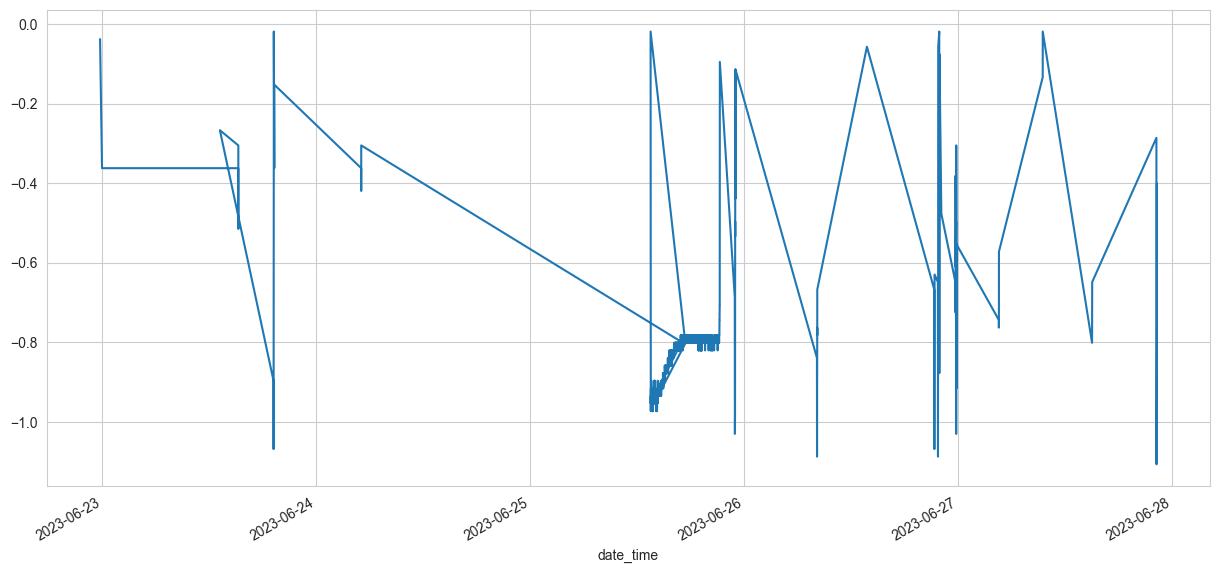

In [23]:
processed_dataset.secundary_multipressure_bar[processed_dataset.secundary_multipressure_bar<0].plot()

La gráfica evidencia como los valores menores a 0 con varios pero la mayoría están muy cerca de cero, se sospecha que el problema es calibraciones del equipo.

In [24]:
processed_dataset.secundary_multipressure_bar[processed_dataset.secundary_multipressure_bar<0].describe()

count    5772.000000
mean       -0.824884
std         0.084507
min        -1.105857
25%        -0.857993
50%        -0.800793
75%        -0.800793
max        -0.019067
Name: secundary_multipressure_bar, dtype: float64

In [25]:
IQR = processed_dataset.secundary_multipressure_bar[processed_dataset.secundary_multipressure_bar<0].quantile(0.75) - processed_dataset.secundary_multipressure_bar[processed_dataset.secundary_multipressure_bar<0].quantile(0.25)

LL = processed_dataset.secundary_multipressure_bar[processed_dataset.secundary_multipressure_bar<0].quantile(0.25) -1.5*IQR
LL

np.float64(-0.9437918250000001)

Se toma la decisión de iterpolar solo los datos que se salen del límite de outliers en los datos menores a cero.

In [26]:
processed_dataset.secundary_multipressure_bar = processed_dataset.secundary_multipressure_bar.mask(processed_dataset.secundary_multipressure_bar < LL, np.nan)
processed_dataset.secundary_multipressure_bar = processed_dataset.secundary_multipressure_bar.interpolate(method="time")

<Axes: xlabel='date_time'>

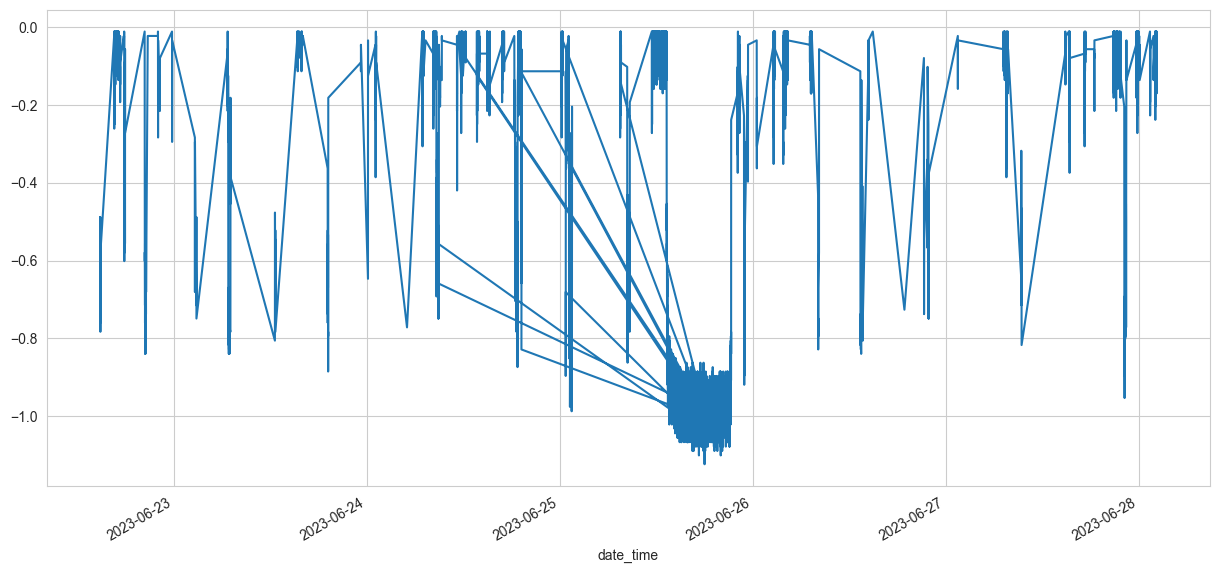

In [27]:
processed_dataset.secundary_p015d1_bar[processed_dataset.secundary_p015d1_bar<0].plot()

La gráfica evidencia como los valores menores a 0 con varios pero la mayoría están muy cerca de cero, se sospecha que el problema es calibraciones del equipo.

In [28]:
processed_dataset.secundary_p015d1_bar[processed_dataset.secundary_p015d1_bar<0].describe()

count    10233.000000
mean        -0.652858
std          0.389015
min         -1.123322
25%         -0.964469
50%         -0.907735
75%         -0.170200
max         -0.011347
Name: secundary_p015d1_bar, dtype: float64

In [29]:
IQR = processed_dataset.secundary_p015d1_bar[processed_dataset.secundary_p015d1_bar<0].quantile(0.75) - processed_dataset.secundary_p015d1_bar[processed_dataset.secundary_p015d1_bar<0].quantile(0.25)

LL = processed_dataset.secundary_p015d1_bar[processed_dataset.secundary_p015d1_bar<0].quantile(0.25) -1.5*IQR
LL

np.float64(-2.155870975)

Se toma la decisión de iterpolar solo los datos que se salen del límite de outliers en los datos menores a cero.

In [30]:
processed_dataset.secundary_p015d1_bar = processed_dataset.secundary_p015d1_bar.mask(processed_dataset.secundary_p015d1_bar < LL, np.nan)
processed_dataset.secundary_p015d1_bar = processed_dataset.secundary_p015d1_bar.interpolate(method="time")

#### Descripción Final de los datos

In [31]:
processed_dataset.describe()

,secundary_pumpspeed_rpm,secundary_pa16d1_bar,secundary_p014d1_bar,secundary_p015d1_bar,secundary_pa7b3_mm,secundary_pa4b2_c,secundary_pa4b5_c,secundary_pu2b2_c,secundary_p012b3_c,secundary_p022b3_c,secundary_pa16d6_c,secundary_p014d6_c,secundary_p015d6_c,secundary_multipressure_bar
count,93978.000000,93978.000000,93978.000000,93978.000000,93978.000000,93978.000000,93978.000000,93978.000000,93978.000000,93978.000000,93978.000000,93978.000000,93978.000000,93978.000000
mean,36.243256,28.960490,94.802332,58.151710,286.810514,96.816336,100.441528,96.730020,92.769168,95.947619,99.168684,90.155246,105.149272,17.187292
std,25.531103,8.188100,50.112338,36.984447,153.112224,12.993555,13.679756,13.151063,14.352947,15.998128,14.582716,12.009157,17.662801,11.481452
min,0.000000,1.455618,1.350256,-1.123322,6.639587,30.400000,30.800000,30.200000,30.200000,23.500000,28.900000,30.200000,29.200000,-0.934259
25%,8.308798,29.439796,45.477530,19.414186,166.608830,99.900000,103.400000,99.800000,94.200000,99.700000,101.900000,91.700000,105.600000,14.509609
50%,42.798168,30.230824,123.134280,79.205565,286.675260,100.000000,103.800000,100.000000,96.100000,100.000000,102.400000,93.000000,109.200000,15.081605
75%,53.763862,33.070736,136.409900,89.105550,405.537480,100.100000,104.100000,100.100000,97.900000,100.200000,102.800000,94.200000,112.100000,15.558268
max,100.000000,36.776240,255.788420,219.910190,730.195300,101.300000,105.600000,101.300000,103.700000,101.500000,869.900000,97.200000,125.800000,80.174650


## Lag Features
Vamos a generar un lag de 5. Vamos a usar lag features para darle al modelo una memoria del pasado. Básicamente, creamos nuevas columnas que contienen los valores de la variable de momentos anteriores. Esto es muy importante porque el modelo no entiende el tiempo por sí solo. Al darle estas pistas del pasado, le ayudamos a reconocer patrones y a usar la información anterior para predecir lo que va a suceder.

In [32]:
processed_dataset = processed_dataset.copy()

target_col = "secundary_multipressure_bar"

# Grupos de features según MI
group_A = [
    "secundary_p014d1_bar",
    "secundary_pa7b3_mm",
    "secundary_pa16d1_bar",
    "secundary_p015d1_bar",
    "secundary_pa4b2_c",
    "secundary_p014d6_c"
]

group_B = [
    "secundary_pa16d6_c",
    "secundary_pa4b5_c",
    "secundary_p012b3_c",
    "secundary_pu2b2_c",
    "secundary_p015d6_c",
    "secundary_p022b3_c"
]

group_C = [
    "secundary_pumpspeed_rpm"
]

# Número de lags por grupo
lags_A = 36
lags_B = 12
lags_C = 4

# Función para generar lags de una lista de columnas
def create_lags(df, cols, n_lags):
    for col in cols:
        for lag in range(1, n_lags + 1):
            df[f"{col}_lag_{lag}"] = df[col].shift(lag)

# Crear lags por grupo directamente en processed_dataset
create_lags(processed_dataset, group_A, lags_A)
create_lags(processed_dataset, group_B, lags_B)
create_lags(processed_dataset, group_C, lags_C)

# Crear el target futuro (+12 pasos = ~1 minuto hacia adelante)
processed_dataset["target_plus_12"] = processed_dataset[target_col].shift(-12)

# Eliminar filas con NaN (primeros 36 y últimos 12)
processed_dataset = processed_dataset.dropna()


processed_dataset.shape, processed_dataset.head()


((93930, 307),
                             secundary_pumpspeed_rpm  secundary_pa16d1_bar  \
 date_time                                                                   
 2023-06-22 14:20:29.950502                39.432655             31.660505   
 2023-06-22 14:20:35.029907                40.503200             31.534071   
 2023-06-22 14:20:40.101851                41.316950             31.751280   
 2023-06-22 14:20:45.173293                40.128124             31.689682   
 2023-06-22 14:20:50.241122                40.182632             31.624846   
 
                             secundary_p014d1_bar  secundary_p015d1_bar  \
 date_time                                                                
 2023-06-22 14:20:29.950502             123.89450             83.057770   
 2023-06-22 14:20:35.029907             123.79238             83.443560   
 2023-06-22 14:20:40.101851             123.84911             82.819490   
 2023-06-22 14:20:45.173293             123.59949             

Los lags usan shift positivo porque miran al pasado, mientras que el target futuro usa shift negativo porque trae el futuro al presente para entrenar el modelo.

In [33]:
print(f"Features generadas después de lags por grupo: {processed_dataset.shape[1]}")

Features generadas después de lags por grupo: 307


## Rolling Means

In [34]:
window_size = 5

processed_dataset['target_MEAN'] = processed_dataset['secundary_multipressure_bar'].shift(1).rolling(window=window_size).mean()
processed_dataset['target_STD'] = processed_dataset['secundary_multipressure_bar'].shift(1).rolling(window=window_size).std()
processed_dataset['target_MIN'] = processed_dataset['secundary_multipressure_bar'].shift(1).rolling(window=window_size).min()
processed_dataset['target_MAX'] = processed_dataset['secundary_multipressure_bar'].shift(1).rolling(window=window_size).max()
processed_dataset = processed_dataset.dropna()

print(f"Features finales: {processed_dataset.shape[1]}")
processed_dataset.head(10)

Features finales: 311


,secundary_pumpspeed_rpm,secundary_pa16d1_bar,secundary_p014d1_bar,secundary_p015d1_bar,secundary_pa7b3_mm,secundary_pa4b2_c,secundary_pa4b5_c,secundary_pu2b2_c,secundary_p012b3_c,secundary_p022b3_c,...,secundary_p022b3_c_lag_12,secundary_pumpspeed_rpm_lag_1,secundary_pumpspeed_rpm_lag_2,secundary_pumpspeed_rpm_lag_3,secundary_pumpspeed_rpm_lag_4,target_plus_12,target_MEAN,target_STD,target_MIN,target_MAX
date_time,,,,,,,,,,,,,,,,,,,,,
2023-06-22 14:20:55.316144,40.598020,31.553522,123.259090,82.864876,27.274475,99.9,103.2,99.9,95.2,99.8,...,99.8,40.182632,40.128124,41.316950,40.503200,14.910006,15.203631,0.240646,14.890940,15.443869
2023-06-22 14:21:00.386923,40.630264,31.585941,122.703100,82.195420,27.274475,99.9,103.3,99.8,95.3,99.6,...,99.7,40.598020,40.182632,40.128124,41.316950,15.253203,15.180751,0.280025,14.776541,15.443869
2023-06-22 14:21:05.472136,40.079910,31.572973,122.635020,82.388310,26.949036,99.9,103.3,99.9,95.4,99.9,...,99.9,40.630264,40.598020,40.182632,40.128124,14.414277,15.169311,0.273523,14.776541,15.443869
2023-06-22 14:21:10.550901,40.567593,31.543797,123.134280,82.808136,26.721191,100.0,103.3,99.8,95.6,100.2,...,100.2,40.079910,40.630264,40.598020,40.182632,15.348536,15.165497,0.268831,14.776541,15.424802
2023-06-22 14:21:15.616747,41.335390,31.657265,123.077540,82.501780,26.591003,99.9,103.3,99.9,95.7,100.2,...,100.3,40.567593,40.079910,40.630264,40.598020,15.176937,14.978646,0.401666,14.414277,15.424802
2023-06-22 14:21:20.901161,39.934322,31.608635,121.942870,81.775590,26.265503,99.9,103.2,99.8,95.7,99.9,...,100.1,41.335390,40.567593,40.079910,40.630264,14.395210,15.024405,0.418161,14.414277,15.424802
2023-06-22 14:21:26.135029,40.293430,31.699410,122.816570,82.365616,26.102783,99.9,103.2,99.8,95.8,99.7,...,99.8,39.934322,41.335390,40.567593,40.079910,15.272269,15.070165,0.396198,14.414277,15.424802
2023-06-22 14:21:31.314520,40.587150,31.641054,122.964070,82.365616,26.135315,99.9,103.2,99.8,96.0,99.7,...,99.7,40.293430,39.934322,41.335390,40.567593,15.196004,15.058725,0.389676,14.414277,15.424802
2023-06-22 14:21:36.421265,40.203896,31.744795,122.782524,82.150030,26.102783,99.9,103.2,99.8,96.1,99.9,...,99.9,40.587150,40.293430,39.934322,41.335390,15.157870,15.020592,0.352447,14.414277,15.234137


## Creación de los conjuntos X & Y

In [35]:
#Conjunto Y
Y = processed_dataset["target_plus_12"]

#Conjunto X
X = processed_dataset.drop(columns=["target_plus_12"])

print("Dimensiones de los conjuntos:")
print(f"X: {X.shape}")
print(f"Y: {Y.shape}")

Dimensiones de los conjuntos:
X: (93925, 310)
Y: (93925,)


In [36]:
print("\n--- Variable Objetivo 'Y' (primeras 5 filas) ---")
Y.head()


--- Variable Objetivo 'Y' (primeras 5 filas) ---


date_time
2023-06-22 14:20:55.316144    14.910006
2023-06-22 14:21:00.386923    15.253203
2023-06-22 14:21:05.472136    14.414277
2023-06-22 14:21:10.550901    15.348536
2023-06-22 14:21:15.616747    15.176937
Name: target_plus_12, dtype: float64

In [37]:
print("\n--- Matriz de Características 'X' (primeras 5 filas) ---")
X.head()


--- Matriz de Características 'X' (primeras 5 filas) ---


,secundary_pumpspeed_rpm,secundary_pa16d1_bar,secundary_p014d1_bar,secundary_p015d1_bar,secundary_pa7b3_mm,secundary_pa4b2_c,secundary_pa4b5_c,secundary_pu2b2_c,secundary_p012b3_c,secundary_p022b3_c,...,secundary_p022b3_c_lag_11,secundary_p022b3_c_lag_12,secundary_pumpspeed_rpm_lag_1,secundary_pumpspeed_rpm_lag_2,secundary_pumpspeed_rpm_lag_3,secundary_pumpspeed_rpm_lag_4,target_MEAN,target_STD,target_MIN,target_MAX
date_time,,,,,,,,,,,,,,,,,,,,,
2023-06-22 14:20:55.316144,40.598020,31.553522,123.25909,82.864876,27.274475,99.9,103.2,99.9,95.2,99.8,...,99.7,99.8,40.182632,40.128124,41.316950,40.503200,15.203631,0.240646,14.890940,15.443869
2023-06-22 14:21:00.386923,40.630264,31.585941,122.70310,82.195420,27.274475,99.9,103.3,99.8,95.3,99.6,...,99.9,99.7,40.598020,40.182632,40.128124,41.316950,15.180751,0.280025,14.776541,15.443869
2023-06-22 14:21:05.472136,40.079910,31.572973,122.63502,82.388310,26.949036,99.9,103.3,99.9,95.4,99.9,...,100.2,99.9,40.630264,40.598020,40.182632,40.128124,15.169311,0.273523,14.776541,15.443869
2023-06-22 14:21:10.550901,40.567593,31.543797,123.13428,82.808136,26.721191,100.0,103.3,99.8,95.6,100.2,...,100.3,100.2,40.079910,40.630264,40.598020,40.182632,15.165497,0.268831,14.776541,15.424802
2023-06-22 14:21:15.616747,41.335390,31.657265,123.07754,82.501780,26.591003,99.9,103.3,99.9,95.7,100.2,...,100.1,100.3,40.567593,40.079910,40.630264,40.598020,14.978646,0.401666,14.414277,15.424802


## Prueba ACF
Utilizamos ACF para determinar si la serie tiene estacionalidad. El objetivo es analizar si presenta algun pico cada n pasos o si no presenta nada, determinamos que no tiene estacionalidad.

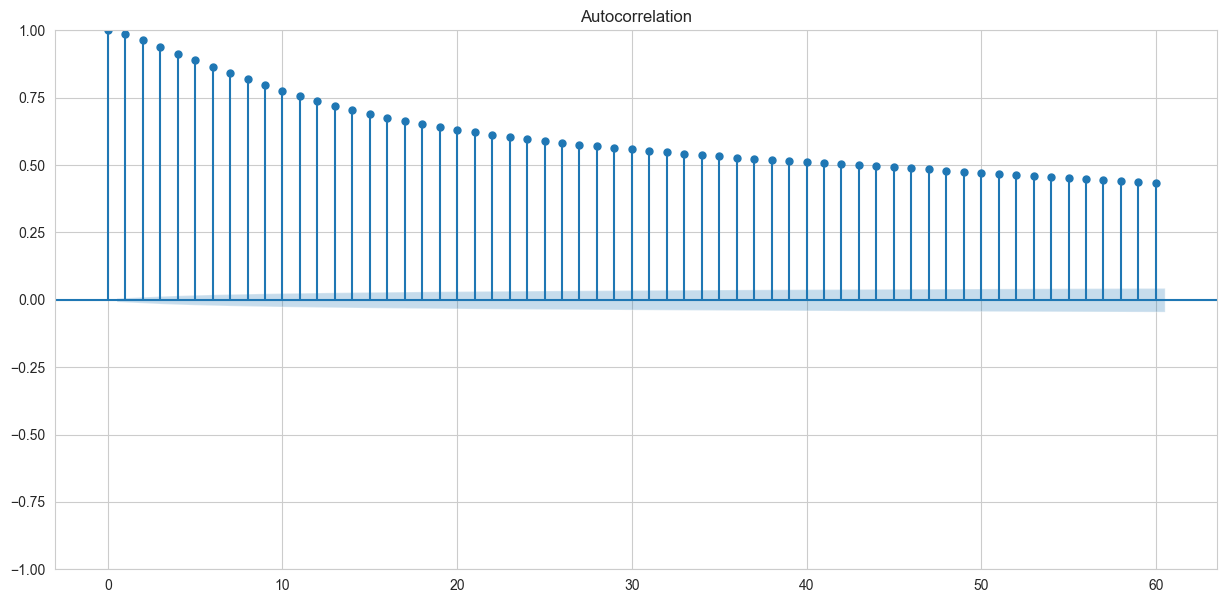

In [38]:
plot_acf(Y, lags = 60)
plt.show()

## Prueba PACF

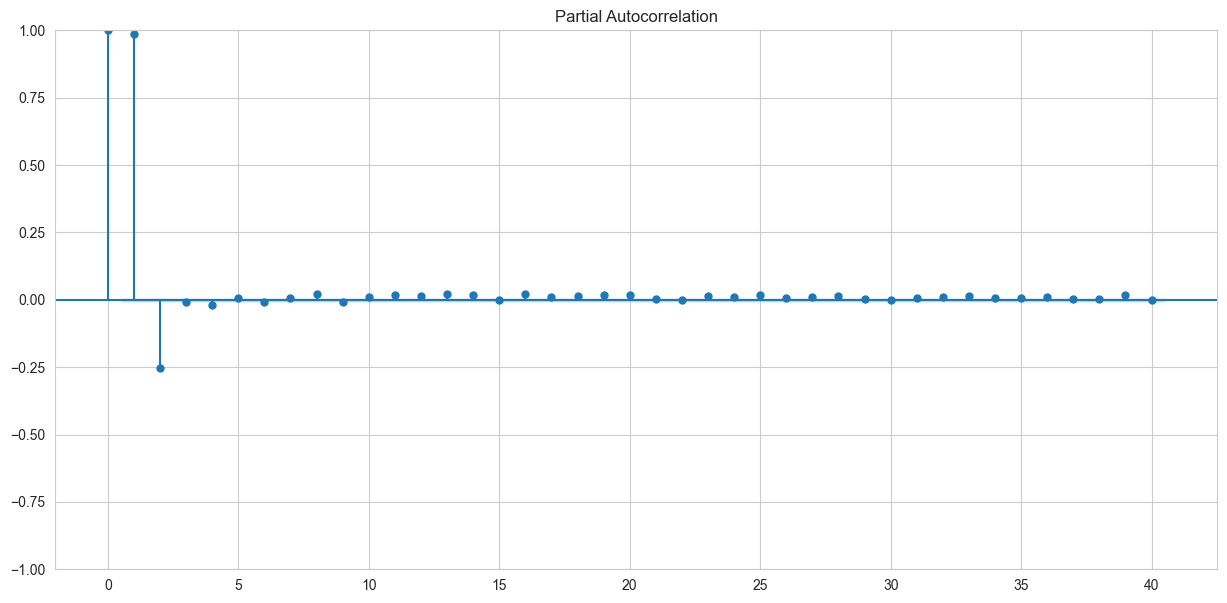

In [39]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

plot_pacf(Y, lags=40)
plt.show()

## Prueba de ADF
Ejecutando la prueba ADF determinamos si la seria de tiempo es estacionaria o no

ADF Statistic: -18.471898
p-value: 0.000000
Estacionaria: True
1%: -3.430
5%: -2.862
10%: -2.567


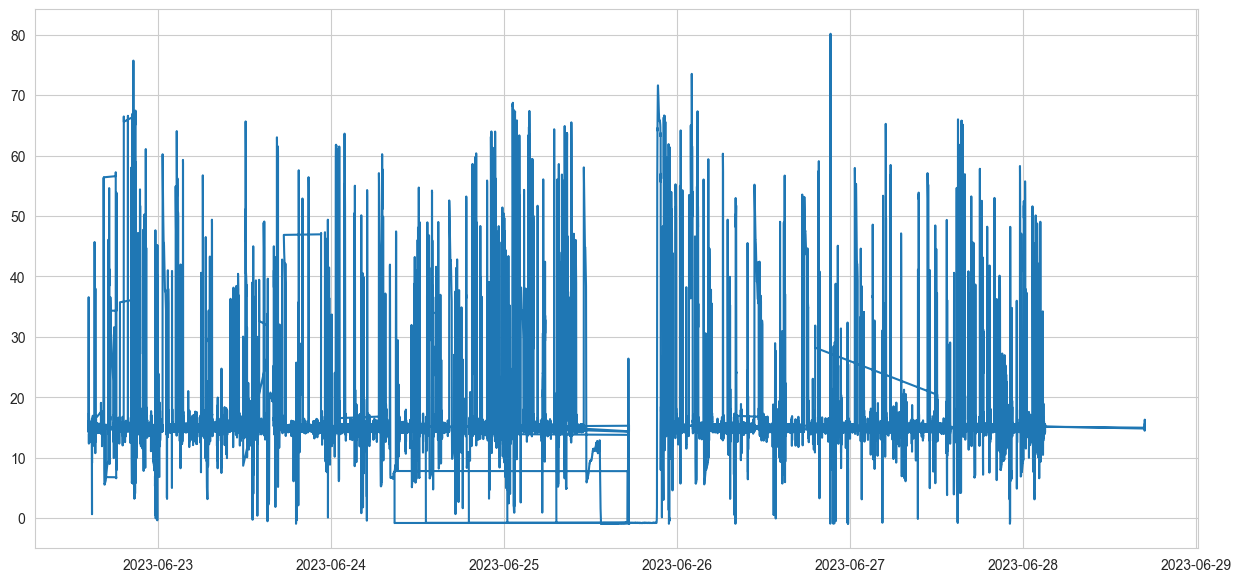

In [40]:
result = adfuller(Y.values)
print(f'ADF Statistic: {result[0]:.6f}')
print(f'p-value: {result[1]:.6f}')
print(f'Estacionaria: {result[1] <= 0.05}')
for key, value in result[4].items():
    print(f'{key}: {value:.3f}')

plt.plot(Y)
plt.show()

## División del dataset en Train - Test
Vamos a dividir el dataset en 80% Train y 20% Test, en este escenario en particular el orden de los datos si importa, no vamos a utilizar ningún algoritmo que nos haga un shuffle de los datos.

Para esto vamos a utilizar el siguiente algoritmo:
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html

In [41]:
print("Tamaño del dataset original: ", len(processed_dataset))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size = 0.2,
                                                    shuffle = False,
                                                    random_state = 42)


print("\nTamaño del train: ", len(X_train))
print("\nTamaño del test: ", len(X_test))

Tamaño del dataset original:  93925

Tamaño del train:  75140

Tamaño del test:  18785


## Escalamiento de datos

In [42]:
# Escalado de características
transformer = RobustScaler().fit(X_train)
X_train_scaled = transformer.transform(X_train)
X_test_scaled = transformer.transform(X_test)

## Comparación de Modelos

Vamos a entrenar múltiples modelos para encontrar el mejor desempeño:
- **SARIMAX**: Series temporales con variables exógenas
- **Random Forest**: Ensemble method no paramétrico
- **Gradient Boosting**: Ensemble potente para regresión
- **XGBoost**: Optimización extrema del gradient boosting

In [43]:
# Función mejorada de cálculo de MAPE
def calculate_mape(y_true, y_pred):
    """Calcula MAPE evitando divisiones por cero"""
    mask = y_true != 0
    if mask.sum() == 0:
        return np.inf
    return (np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])).mean() * 100

# Función para crear un resumen de métricas
def create_metrics_summary(y_true, y_pred, model_name):
    """Crea un resumen de métricas para un modelo"""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = calculate_mape(y_true.values if hasattr(y_true, 'values') else y_true, 
                          y_pred.values if hasattr(y_pred, 'values') else y_pred)
    
    return {
        'Model': model_name,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2,
        'MAPE (%)': mape
    }

print("Funciones de evaluación definidas correctamente")

Funciones de evaluación definidas correctamente


In [44]:
# SARIMAX model with auto_arima
endog_train = Y_train
endog_test = Y_test
exog_train = X_train_scaled
exog_test = X_test_scaled
seasonal_period = 1

# Use auto_arima to find optimal order and seasonal_order
print("=" * 80)
print("1. MODELO SARIMAX CON AUTO_ARIMA")
print("=" * 80)
print("\nBuscando parámetros ARIMA óptimos...")
auto_model = auto_arima(
    endog_train,
    X=exog_train,
    seasonal=False,
    m=seasonal_period,
    max_p=5, max_q=5,
    #max_P=2, max_Q=2,
    d=None, D=None,
    max_d=2,
    stepwise=True,
    trace=True,
    error_action='ignore',
    suppress_warnings=True
)

# Get optimal order and seasonal_order
order = auto_model.order
seasonal_order = auto_model.seasonal_order

#print(f"Resumen de auto arima: "{auto_model.summary()})
print(f"Orden óptimo (p,d,q): {order}")
print(f"Orden estacional (P,D,Q,m): {seasonal_order}")

1. MODELO SARIMAX CON AUTO_ARIMA

Buscando parámetros ARIMA óptimos...
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=339869.472, Time=802.47 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=723088.677, Time=636.90 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=342822.067, Time=624.58 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=520571.236, Time=702.82 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=339980.346, Time=795.46 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=340609.856, Time=711.44 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=340169.832, Time=799.02 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=340021.355, Time=791.95 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=340166.215, Time=707.16 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=340128.625, Time=794.32 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=339764.522, Time=802.13 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=340121.655, Time=792.85 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=3397


Métrica                Valor
------------------------------
RMSE                 17.0216
MAE                  14.0643
R²                   -2.6729
MAPE (%)             88.4688


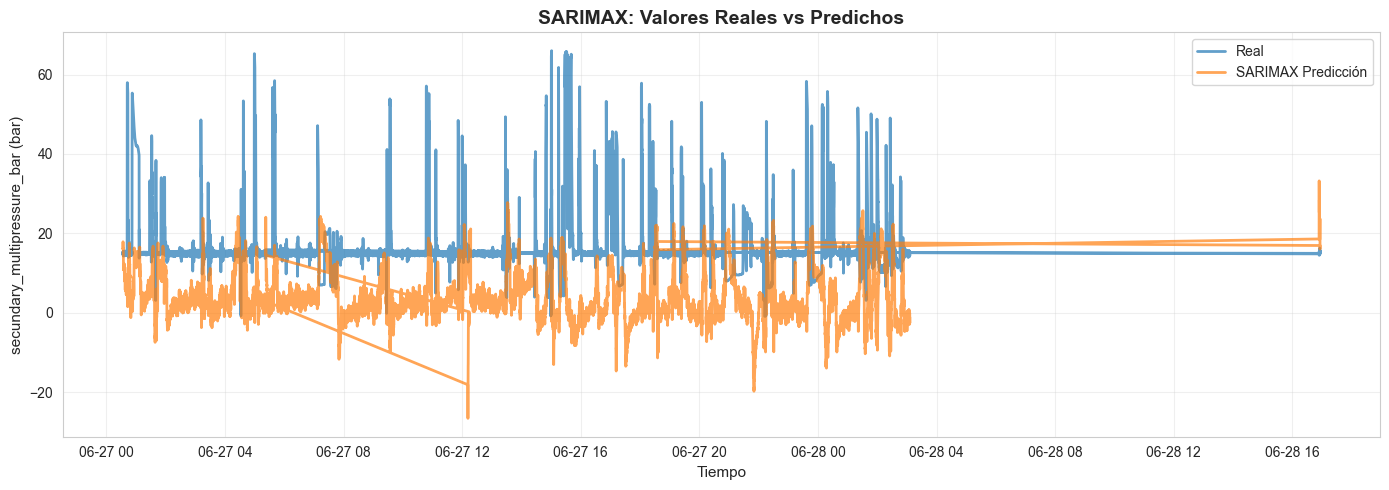

In [45]:
# Crear y ajustar el modelo SARIMAX con exógenas
model = SARIMAX(endog_train,
                exog=exog_train,
                order=order,
                seasonal_order=seasonal_order,
                enforce_stationarity=False,
                enforce_invertibility=False)

model_fit = model.fit(disp=False)

# Realizar forecast sobre el conjunto de test
n_steps = len(endog_test)
forecast_res = model_fit.get_forecast(steps=n_steps, exog=exog_test)
y_pred_sarimax = forecast_res.predicted_mean

# Métricas SARIMAX
sarimax_metrics = create_metrics_summary(endog_test, y_pred_sarimax, "SARIMAX")

print(f"\n{'Métrica':<15} {'Valor':>12}")
print("-" * 30)
for key, value in sarimax_metrics.items():
    if key != 'Model':
        if isinstance(value, float):
            print(f"{key:<15} {value:>12.4f}")
            
# Visualización SARIMAX
plt.figure(figsize=(14, 5))
plt.plot(endog_test.index, endog_test.values, label='Real', linewidth=2, alpha=0.7)
plt.plot(endog_test.index, y_pred_sarimax.values, label='SARIMAX Predicción', linewidth=2, alpha=0.7)
plt.title('SARIMAX: Valores Reales vs Predichos', fontsize=14, fontweight='bold')
plt.xlabel('Tiempo', fontsize=11)
plt.ylabel('secundary_multipressure_bar (bar)', fontsize=11)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


2. MODELO RANDOM FOREST

Entrenando Random Forest...

Métrica                Valor
------------------------------
RMSE                  7.4392
MAE                   3.9260
R²                    0.2985
MAPE (%)             38.5867


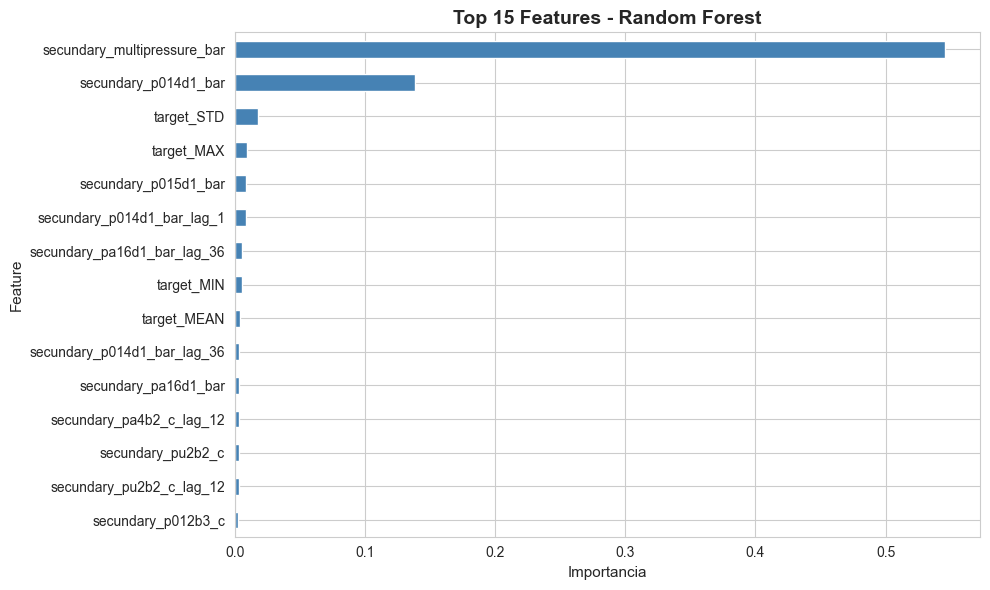

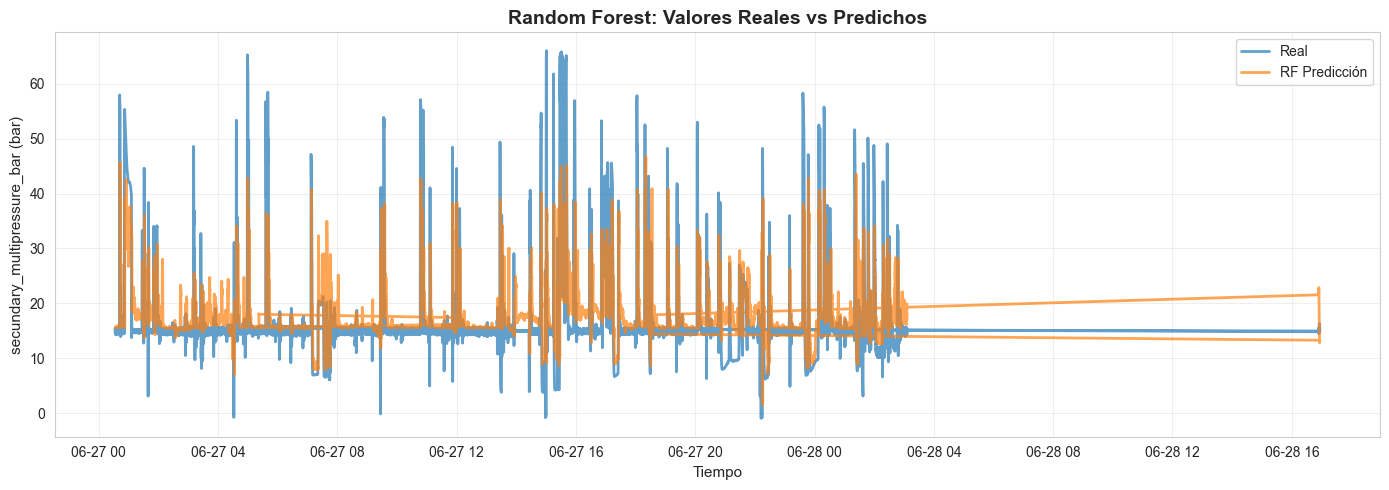

In [46]:

# 2. RANDOM FOREST REGRESSOR
print("\n" + "=" * 80)
print("2. MODELO RANDOM FOREST")
print("=" * 80)

rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1,
    verbose=0
)

print("\nEntrenando Random Forest...")
rf_model.fit(X_train_scaled, Y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

rf_metrics = create_metrics_summary(Y_test, y_pred_rf, "Random Forest")

print(f"\n{'Métrica':<15} {'Valor':>12}")
print("-" * 30)
for key, value in rf_metrics.items():
    if key != 'Model':
        if isinstance(value, float):
            print(f"{key:<15} {value:>12.4f}")

# Feature importance
feature_importance_rf = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
feature_importance_rf.plot(kind='barh', color='steelblue')
plt.title('Top 15 Features - Random Forest', fontsize=14, fontweight='bold')
plt.xlabel('Importancia', fontsize=11)
plt.ylabel('Feature', fontsize=11)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Visualización
plt.figure(figsize=(14, 5))
plt.plot(Y_test.index, Y_test.values, label='Real', linewidth=2, alpha=0.7)
plt.plot(Y_test.index, y_pred_rf, label='RF Predicción', linewidth=2, alpha=0.7)
plt.title('Random Forest: Valores Reales vs Predichos', fontsize=14, fontweight='bold')
plt.xlabel('Tiempo', fontsize=11)
plt.ylabel('secundary_multipressure_bar (bar)', fontsize=11)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


3. MODELO GRADIENT BOOSTING

Entrenando Gradient Boosting...

Métrica                Valor
------------------------------
RMSE                  7.4276
MAE                   3.6476
R²                    0.3006
MAPE (%)             36.0398


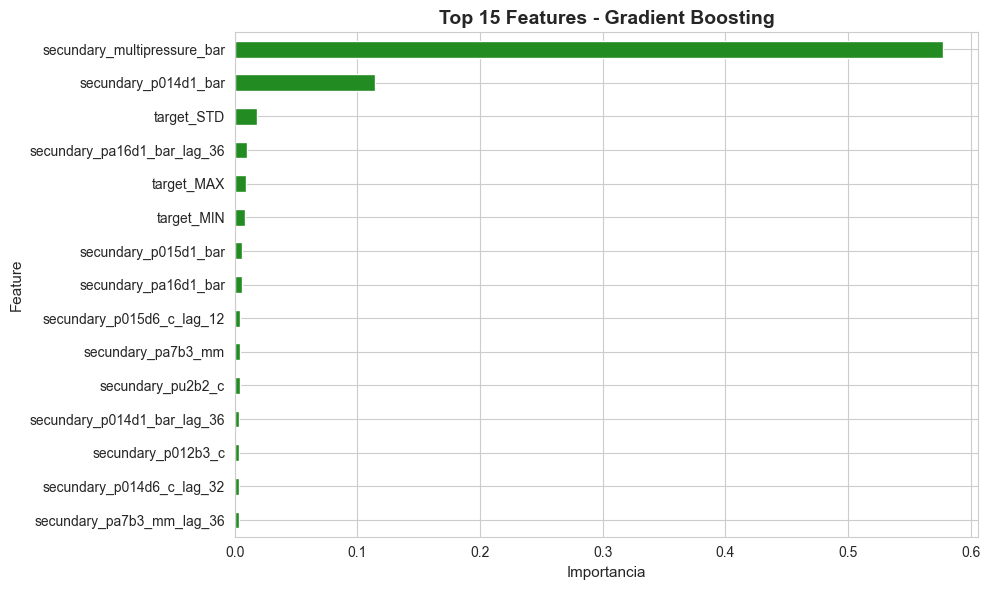

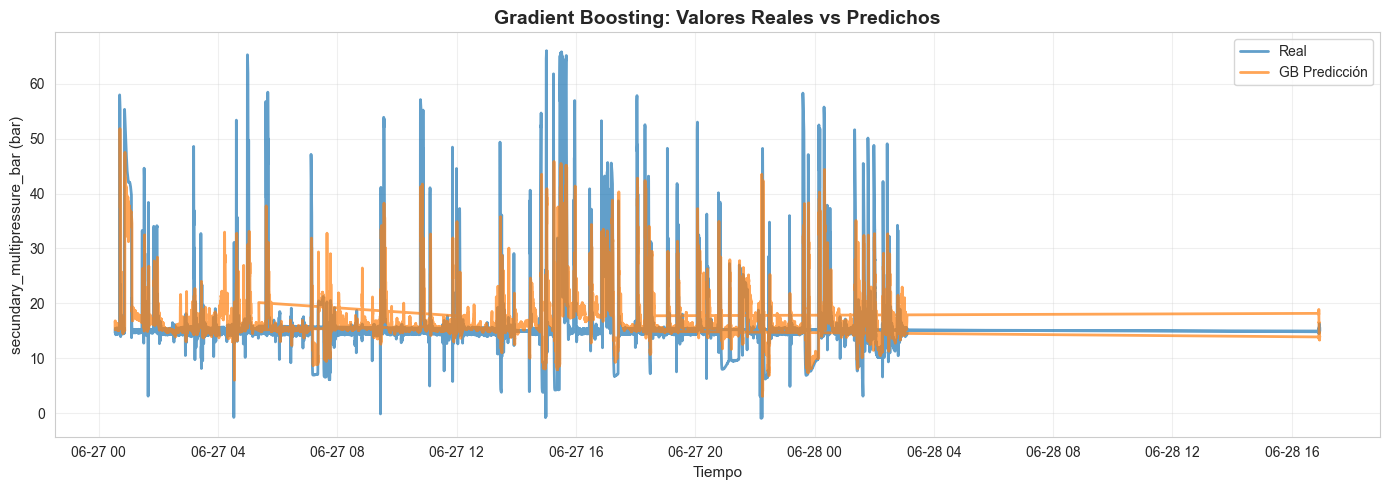

In [47]:

# 3. GRADIENT BOOSTING REGRESSOR
print("\n" + "=" * 80)
print("3. MODELO GRADIENT BOOSTING")
print("=" * 80)

gb_model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    min_samples_split=5,
    min_samples_leaf=2,
    subsample=0.8,
    random_state=42,
    verbose=0
)

print("\nEntrenando Gradient Boosting...")
gb_model.fit(X_train_scaled, Y_train)
y_pred_gb = gb_model.predict(X_test_scaled)

gb_metrics = create_metrics_summary(Y_test, y_pred_gb, "Gradient Boosting")

print(f"\n{'Métrica':<15} {'Valor':>12}")
print("-" * 30)
for key, value in gb_metrics.items():
    if key != 'Model':
        if isinstance(value, float):
            print(f"{key:<15} {value:>12.4f}")

# Feature importance
feature_importance_gb = pd.Series(
    gb_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
feature_importance_gb.plot(kind='barh', color='forestgreen')
plt.title('Top 15 Features - Gradient Boosting', fontsize=14, fontweight='bold')
plt.xlabel('Importancia', fontsize=11)
plt.ylabel('Feature', fontsize=11)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Visualización
plt.figure(figsize=(14, 5))
plt.plot(Y_test.index, Y_test.values, label='Real', linewidth=2, alpha=0.7)
plt.plot(Y_test.index, y_pred_gb, label='GB Predicción', linewidth=2, alpha=0.7)
plt.title('Gradient Boosting: Valores Reales vs Predichos', fontsize=14, fontweight='bold')
plt.xlabel('Tiempo', fontsize=11)
plt.ylabel('secundary_multipressure_bar (bar)', fontsize=11)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


4. MODELO XGBOOST

Entrenando XGBoost...

Métrica                Valor
------------------------------
RMSE                  7.4918
MAE                   3.8672
R²                    0.2885
MAPE (%)             37.7076


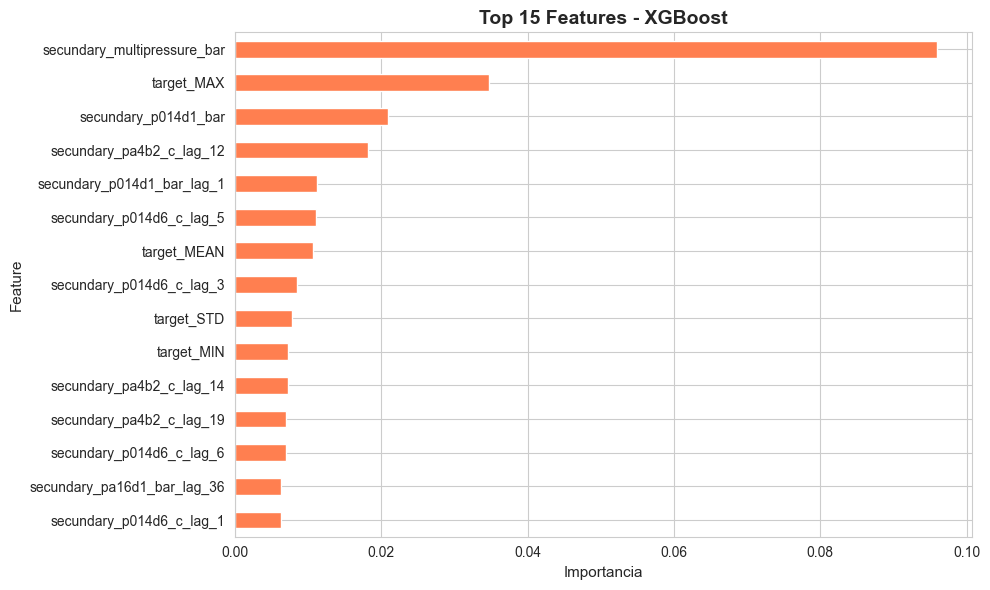

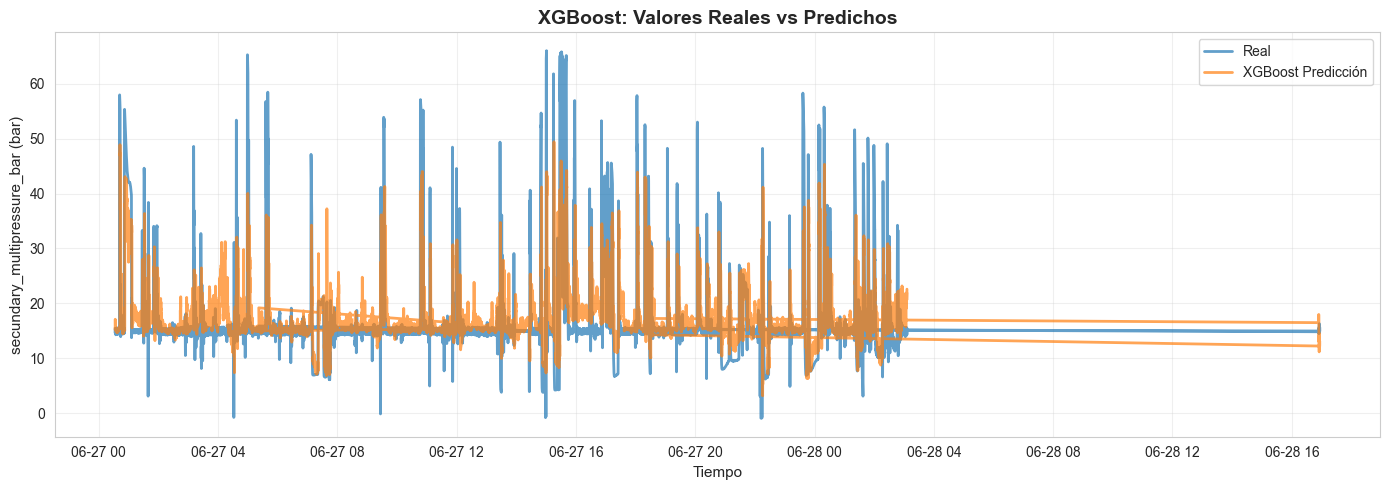

In [48]:

# 4. XGBOOST REGRESSOR
try:
    import xgboost as xgb
    
    print("\n" + "=" * 80)
    print("4. MODELO XGBOOST")
    print("=" * 80)
    
    xgb_model = xgb.XGBRegressor(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=7,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        verbosity=0,
        tree_method='hist'
    )
    
    print("\nEntrenando XGBoost...")
    xgb_model.fit(X_train_scaled, Y_train, verbose=False)
    y_pred_xgb = xgb_model.predict(X_test_scaled)
    
    xgb_metrics = create_metrics_summary(Y_test, y_pred_xgb, "XGBoost")
    
    print(f"\n{'Métrica':<15} {'Valor':>12}")
    print("-" * 30)
    for key, value in xgb_metrics.items():
        if key != 'Model':
            if isinstance(value, float):
                print(f"{key:<15} {value:>12.4f}")
    
    # Feature importance
    feature_importance_xgb = pd.Series(
        xgb_model.feature_importances_,
        index=X.columns
    ).sort_values(ascending=False).head(15)
    
    plt.figure(figsize=(10, 6))
    feature_importance_xgb.plot(kind='barh', color='coral')
    plt.title('Top 15 Features - XGBoost', fontsize=14, fontweight='bold')
    plt.xlabel('Importancia', fontsize=11)
    plt.ylabel('Feature', fontsize=11)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    # Visualización
    plt.figure(figsize=(14, 5))
    plt.plot(Y_test.index, Y_test.values, label='Real', linewidth=2, alpha=0.7)
    plt.plot(Y_test.index, y_pred_xgb, label='XGBoost Predicción', linewidth=2, alpha=0.7)
    plt.title('XGBoost: Valores Reales vs Predichos', fontsize=14, fontweight='bold')
    plt.xlabel('Tiempo', fontsize=11)
    plt.ylabel('secundary_multipressure_bar (bar)', fontsize=11)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
except ImportError:
    print("XGBoost no instalado, saltando este modelo")

# Resultados


COMPARACIÓN GENERAL DE MODELOS


            Model      RMSE       MAE        R²  MAPE (%)
          SARIMAX 17.021643 14.064282 -2.672860 88.468848
    Random Forest  7.439239  3.925971  0.298450 38.586713
Gradient Boosting  7.427602  3.647585  0.300643 36.039825
          XGBoost  7.491772  3.867190  0.288507 37.707649

--------------------------------------------------------------------------------
MEJOR MODELO POR MÉTRICA:
--------------------------------------------------------------------------------
RMSE           : Gradient Boosting    = 7.4276
MAE            : Gradient Boosting    = 3.6476
R²             : Gradient Boosting    = 0.3006
MAPE (%)       : Gradient Boosting    = 36.0398


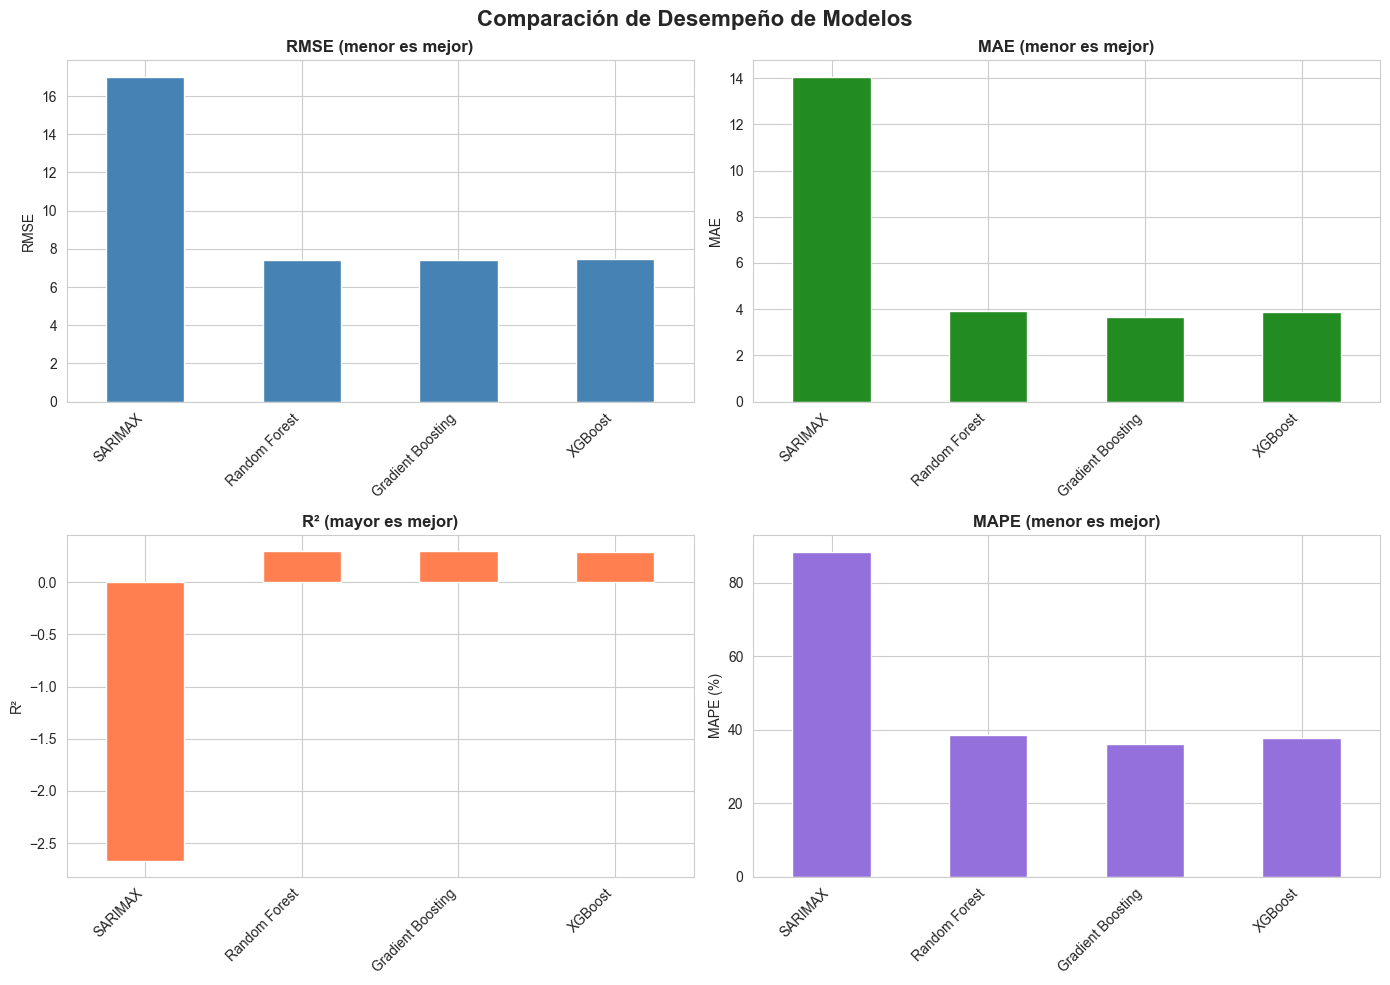

In [49]:

# COMPARACIÓN DE MODELOS
print("\n" + "=" * 80)
print("COMPARACIÓN GENERAL DE MODELOS")
print("=" * 80)

# Crear tabla comparativa
results_list = [sarimax_metrics, rf_metrics, gb_metrics]
try:
    results_list.append(xgb_metrics)
except:
    pass

results_df = pd.DataFrame(results_list)
print("\n")
print(results_df.to_string(index=False))

# Encontrar mejor modelo por cada métrica
print("\n" + "-" * 80)
print("MEJOR MODELO POR MÉTRICA:")
print("-" * 80)

metrics_cols = ['RMSE', 'MAE', 'R²', 'MAPE (%)']
for metric in metrics_cols:
    if metric == 'R²':  # Maximizar R²
        best_idx = results_df[metric].idxmax()
    else:  # Minimizar otros
        best_idx = results_df[metric].idxmin()
    
    best_model = results_df.loc[best_idx, 'Model']
    best_value = results_df.loc[best_idx, metric]
    print(f"{metric:<15}: {best_model:<20} = {best_value:.4f}")

# Visualización comparativa
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Comparación de Desempeño de Modelos', fontsize=16, fontweight='bold')

# RMSE
ax = axes[0, 0]
results_df.plot(x='Model', y='RMSE', kind='bar', ax=ax, color='steelblue', legend=False)
ax.set_title('RMSE (menor es mejor)', fontweight='bold')
ax.set_ylabel('RMSE')
ax.set_xlabel('')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

# MAE
ax = axes[0, 1]
results_df.plot(x='Model', y='MAE', kind='bar', ax=ax, color='forestgreen', legend=False)
ax.set_title('MAE (menor es mejor)', fontweight='bold')
ax.set_ylabel('MAE')
ax.set_xlabel('')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

# R²
ax = axes[1, 0]
results_df.plot(x='Model', y='R²', kind='bar', ax=ax, color='coral', legend=False)
ax.set_title('R² (mayor es mejor)', fontweight='bold')
ax.set_ylabel('R²')
ax.set_xlabel('')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

# MAPE
ax = axes[1, 1]
results_df.plot(x='Model', y='MAPE (%)', kind='bar', ax=ax, color='mediumpurple', legend=False)
ax.set_title('MAPE (menor es mejor)', fontweight='bold')
ax.set_ylabel('MAPE (%)')
ax.set_xlabel('')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


ANÁLISIS DE RESIDUOS

Mejor modelo: Gradient Boosting (R² = 0.3006)

Estadísticas de residuos:
  Media: -0.058034
  Desv. Est.: 7.427375
  Min: -44.334364
  Max: 55.486345


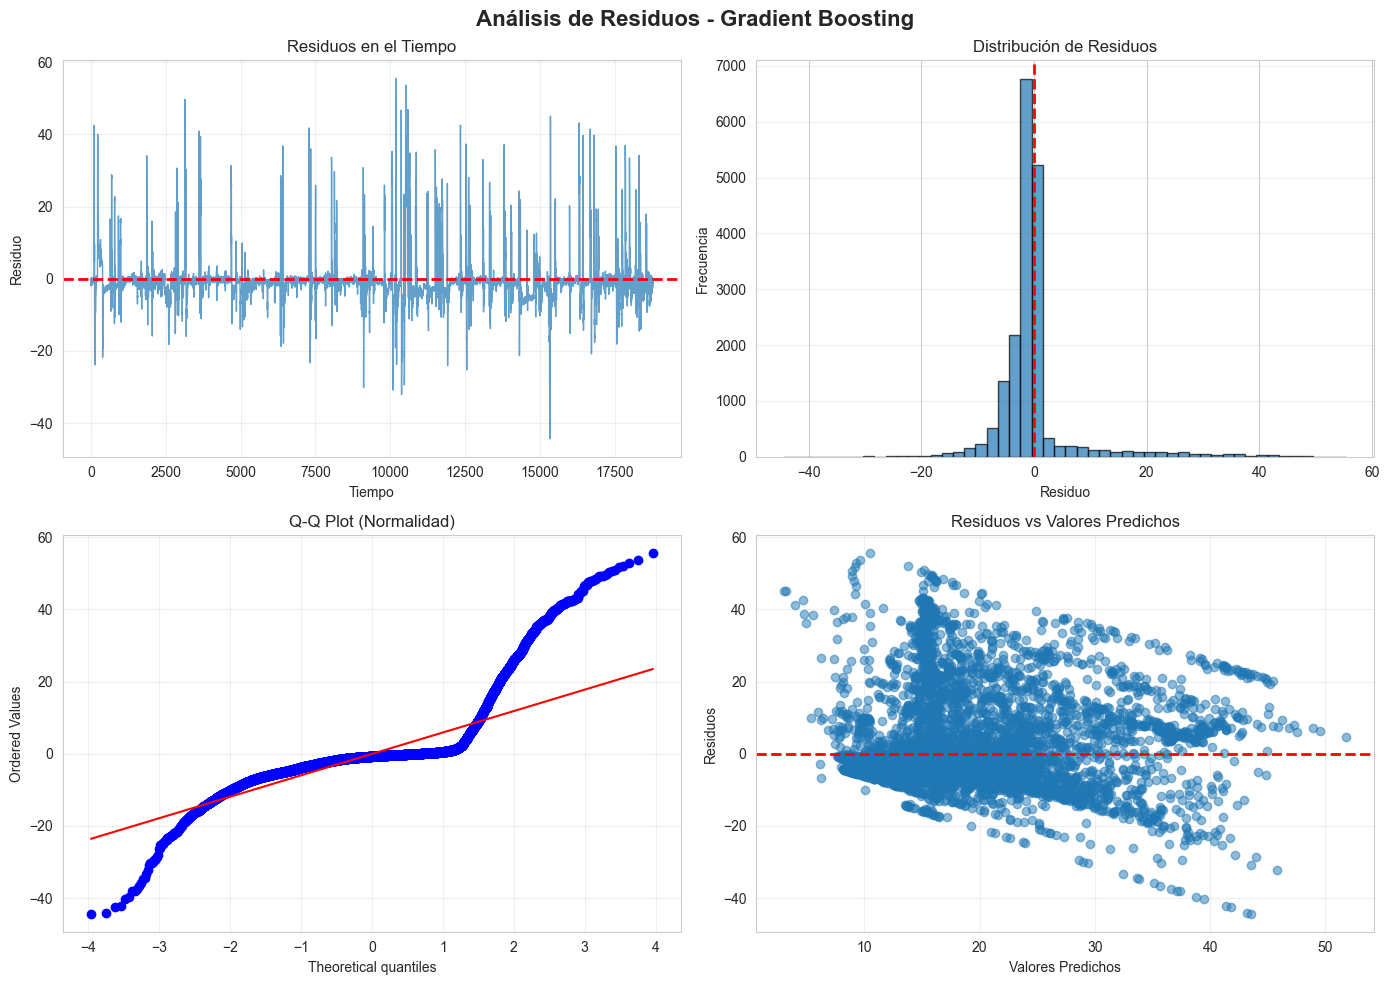

In [50]:

# ANÁLISIS DE RESIDUOS - MEJOR MODELO
print("\n" + "=" * 80)
print("ANÁLISIS DE RESIDUOS")
print("=" * 80)

# Identificar mejor modelo por R²
best_r2_idx = results_df['R²'].idxmax()
best_model_name = results_df.loc[best_r2_idx, 'Model']

if best_model_name == 'SARIMAX':
    y_pred_best = y_pred_sarimax
    y_test_best = endog_test
    print(f"\nMejor modelo: {best_model_name} (R² = {results_df.loc[best_r2_idx, 'R²']:.4f})")
elif best_model_name == 'Random Forest':
    y_pred_best = y_pred_rf
    y_test_best = Y_test
    print(f"\nMejor modelo: {best_model_name} (R² = {results_df.loc[best_r2_idx, 'R²']:.4f})")
elif best_model_name == 'Gradient Boosting':
    y_pred_best = y_pred_gb
    y_test_best = Y_test
    print(f"\nMejor modelo: {best_model_name} (R² = {results_df.loc[best_r2_idx, 'R²']:.4f})")
else:  # XGBoost
    y_pred_best = y_pred_xgb
    y_test_best = Y_test
    print(f"\nMejor modelo: {best_model_name} (R² = {results_df.loc[best_r2_idx, 'R²']:.4f})")

# Calcular residuos
residuos = y_test_best.values - y_pred_best if hasattr(y_test_best, 'values') else y_test_best - y_pred_best

# Análisis estadístico de residuos
print(f"\nEstadísticas de residuos:")
print(f"  Media: {residuos.mean():.6f}")
print(f"  Desv. Est.: {residuos.std():.6f}")
print(f"  Min: {residuos.min():.6f}")
print(f"  Max: {residuos.max():.6f}")

# Visualización de residuos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle(f'Análisis de Residuos - {best_model_name}', fontsize=16, fontweight='bold')

# Residuos en el tiempo
ax = axes[0, 0]
ax.plot(residuos, linewidth=1, alpha=0.7)
ax.axhline(y=0, color='r', linestyle='--', linewidth=2)
ax.set_title('Residuos en el Tiempo')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Residuo')
ax.grid(True, alpha=0.3)

# Histograma de residuos
ax = axes[0, 1]
ax.hist(residuos, bins=50, edgecolor='black', alpha=0.7)
ax.axvline(x=0, color='r', linestyle='--', linewidth=2)
ax.set_title('Distribución de Residuos')
ax.set_xlabel('Residuo')
ax.set_ylabel('Frecuencia')
ax.grid(True, alpha=0.3, axis='y')

# Q-Q plot
from scipy import stats
ax = axes[1, 0]
stats.probplot(residuos, dist="norm", plot=ax)
ax.set_title('Q-Q Plot (Normalidad)')
ax.grid(True, alpha=0.3)

# Residuos vs Predichos
ax = axes[1, 1]
ax.scatter(y_pred_best, residuos, alpha=0.5)
ax.axhline(y=0, color='r', linestyle='--', linewidth=2)
ax.set_title('Residuos vs Valores Predichos')
ax.set_xlabel('Valores Predichos')
ax.set_ylabel('Residuos')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Test de normalidad Shapiro-Wilk
if len(residuos) <= 5000:
    from scipy.stats import shapiro
    stat, p_value = shapiro(residuos)
    print(f"\nTest Shapiro-Wilk (normalidad de residuos):")
    print(f"  Estadístico: {stat:.6f}")
    print(f"  p-value: {p_value:.6f}")
    print(f"  Resultado: {'Residuos son normales' if p_value > 0.05 else 'Residuos NO son normales'}")


VALIDACIÓN CRUZADA TEMPORAL (Time Series Split)

Realizando 5 splits temporales...

Fold 1: Train=15655, Test=15654
  RF R²: 0.1187 | GB R²: 0.0605 | SARIMAX R²: -12.1659
Fold 2: Train=31309, Test=15654
  RF R²: 0.2880 | GB R²: 0.3022 | SARIMAX R²: -1.3574
Fold 3: Train=46963, Test=15654
  RF R²: 0.5186 | GB R²: 0.4839 | SARIMAX R²: -12.6935
Fold 4: Train=62617, Test=15654
  RF R²: 0.2980 | GB R²: 0.4565 | SARIMAX R²: -1.6795
Fold 5: Train=78271, Test=15654
  RF R²: 0.3070 | GB R²: 0.3177 | SARIMAX R²: -0.5958

--------------------------------------------------------------------------------
RESUMEN DE VALIDACIÓN CRUZADA:
--------------------------------------------------------------------------------

Random Forest:
  Media R²: 0.3061 ± 0.1420

Gradient Boosting:
  Media R²: 0.3241 ± 0.1681

SARIMAX:
  Media R²: -5.6984 ± 6.1602


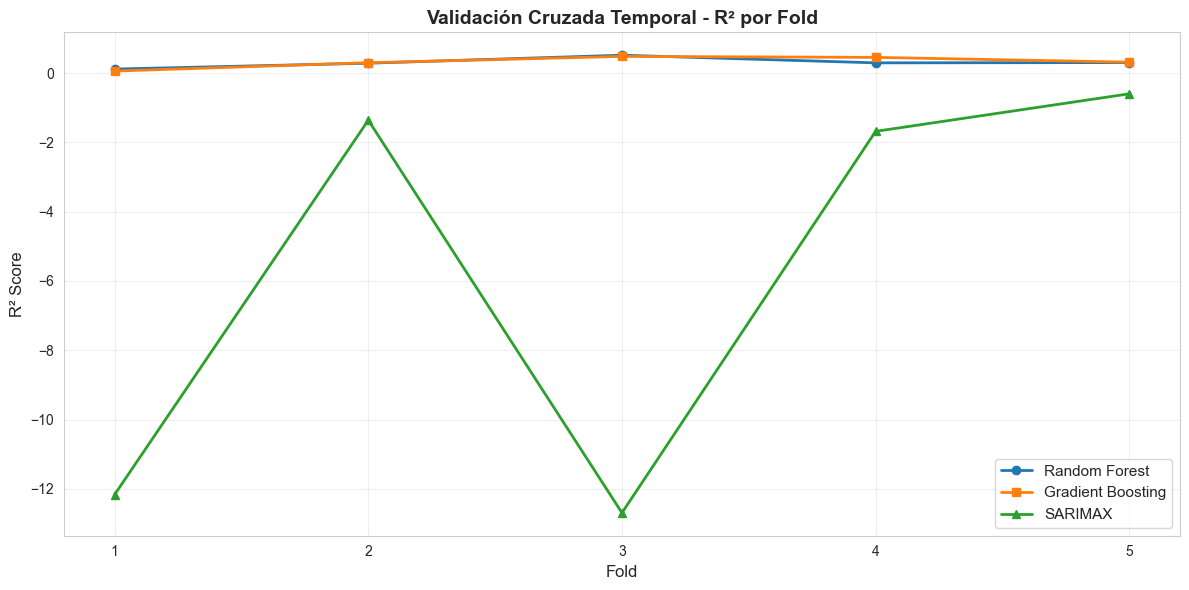

In [51]:

# VALIDACIÓN CRUZADA TEMPORAL
print("\n" + "=" * 80)
print("VALIDACIÓN CRUZADA TEMPORAL (Time Series Split)")
print("=" * 80)

# Usar TimeSeriesSplit para validación temporal
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

cv_results = {
    'fold': [],
    'train_size': [],
    'test_size': [],
    'rf_r2': [],
    'gb_r2': [],
    'sarimax_r2': []
}

print(f"\nRealizando {n_splits} splits temporales...\n")

fold_num = 0
for train_idx, test_idx in tscv.split(X):
    fold_num += 1
    
    X_cv_train, X_cv_test = X.iloc[train_idx], X.iloc[test_idx]
    Y_cv_train, Y_cv_test = Y.iloc[train_idx], Y.iloc[test_idx]
    
    # Escalar
    scaler_cv = RobustScaler()
    X_cv_train_scaled = scaler_cv.fit_transform(X_cv_train)
    X_cv_test_scaled = scaler_cv.transform(X_cv_test)
    
    # Random Forest
    rf_cv = RandomForestRegressor(n_estimators=100, max_depth=12, random_state=42, n_jobs=-1)
    rf_cv.fit(X_cv_train_scaled, Y_cv_train)
    y_pred_rf_cv = rf_cv.predict(X_cv_test_scaled)
    r2_rf_cv = r2_score(Y_cv_test, y_pred_rf_cv)
    
    # Gradient Boosting
    gb_cv = GradientBoostingRegressor(n_estimators=100, learning_rate=0.05, max_depth=6, random_state=42)
    gb_cv.fit(X_cv_train_scaled, Y_cv_train)
    y_pred_gb_cv = gb_cv.predict(X_cv_test_scaled)
    r2_gb_cv = r2_score(Y_cv_test, y_pred_gb_cv)
    
    # SARIMAX (simplificado para CV)
    try:
        model_cv = SARIMAX(Y_cv_train, exog=X_cv_train_scaled, order=(1,1,1), 
                          seasonal_order=(1,0,1,7), enforce_stationarity=False, 
                          enforce_invertibility=False)
        model_cv_fit = model_cv.fit(disp=False)
        forecast_cv = model_cv_fit.get_forecast(steps=len(Y_cv_test), exog=X_cv_test_scaled)
        y_pred_sarimax_cv = forecast_cv.predicted_mean.values
        r2_sarimax_cv = r2_score(Y_cv_test, y_pred_sarimax_cv)
    except:
        r2_sarimax_cv = np.nan
    
    cv_results['fold'].append(fold_num)
    cv_results['train_size'].append(len(train_idx))
    cv_results['test_size'].append(len(test_idx))
    cv_results['rf_r2'].append(r2_rf_cv)
    cv_results['gb_r2'].append(r2_gb_cv)
    cv_results['sarimax_r2'].append(r2_sarimax_cv)
    
    print(f"Fold {fold_num}: Train={len(train_idx)}, Test={len(test_idx)}")
    print(f"  RF R²: {r2_rf_cv:.4f} | GB R²: {r2_gb_cv:.4f} | SARIMAX R²: {r2_sarimax_cv:.4f}")

cv_df = pd.DataFrame(cv_results)

# Resumen CV
print("\n" + "-" * 80)
print("RESUMEN DE VALIDACIÓN CRUZADA:")
print("-" * 80)
print(f"\nRandom Forest:")
print(f"  Media R²: {cv_df['rf_r2'].mean():.4f} ± {cv_df['rf_r2'].std():.4f}")
print(f"\nGradient Boosting:")
print(f"  Media R²: {cv_df['gb_r2'].mean():.4f} ± {cv_df['gb_r2'].std():.4f}")
print(f"\nSARIMAX:")
print(f"  Media R²: {cv_df['sarimax_r2'].mean():.4f} ± {cv_df['sarimax_r2'].std():.4f}")

# Visualización CV
plt.figure(figsize=(12, 6))
plt.plot(cv_df['fold'], cv_df['rf_r2'], marker='o', label='Random Forest', linewidth=2)
plt.plot(cv_df['fold'], cv_df['gb_r2'], marker='s', label='Gradient Boosting', linewidth=2)
plt.plot(cv_df['fold'], cv_df['sarimax_r2'], marker='^', label='SARIMAX', linewidth=2)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.title('Validación Cruzada Temporal - R² por Fold', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(cv_df['fold'])
plt.tight_layout()
plt.show()